# Importing Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Reading of CSV file

In [5]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/DIC project/airbnb-listings.csv',delimiter=';')
print(df)

<ipython-input-5-7c822e7dfc90>:2: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DIC project/airbnb-listings.csv',delimiter=';')


              ID                            Listing Url       Scrape ID  \
0        6017649   https://www.airbnb.com/rooms/6017649  20170402075052   
1        9192415   https://www.airbnb.com/rooms/9192415  20170402075052   
2         743788    https://www.airbnb.com/rooms/743788  20170402075052   
3       13153299  https://www.airbnb.com/rooms/13153299  20170402075052   
4         277011    https://www.airbnb.com/rooms/277011  20170402075052   
...          ...                                    ...             ...   
494949   4749982   https://www.airbnb.com/rooms/4749982  20170507222235   
494950  16822451  https://www.airbnb.com/rooms/16822451  20170507222235   
494951  17998459  https://www.airbnb.com/rooms/17998459  20170507222235   
494952  17518182  https://www.airbnb.com/rooms/17518182  20170507222235   
494953  10562264  https://www.airbnb.com/rooms/10562264  20170507222235   

       Last Scraped                                               Name  \
0        2017-04-02      

# Data cleaning

In [6]:
df.isna().sum().to_dict()

{'ID': 0,
 'Listing Url': 0,
 'Scrape ID': 0,
 'Last Scraped': 1,
 'Name': 418,
 'Summary': 16201,
 'Space': 147936,
 'Description': 160,
 'Experiences Offered': 0,
 'Neighborhood Overview': 203350,
 'Notes': 297364,
 'Transit': 191168,
 'Access': 226555,
 'Interaction': 238495,
 'House Rules': 197939,
 'Thumbnail Url': 94834,
 'Medium Url': 94835,
 'Picture Url': 734,
 'XL Picture Url': 94834,
 'Host ID': 0,
 'Host URL': 0,
 'Host Name': 505,
 'Host Since': 505,
 'Host Location': 2263,
 'Host About': 198680,
 'Host Response Time': 115069,
 'Host Response Rate': 115070,
 'Host Acceptance Rate': 452696,
 'Host Thumbnail Url': 505,
 'Host Picture Url': 505,
 'Host Neighbourhood': 124217,
 'Host Listings Count': 505,
 'Host Total Listings Count': 506,
 'Host Verifications': 840,
 'Street': 1,
 'Neighbourhood': 149551,
 'Neighbourhood Cleansed': 1,
 'Neighbourhood Group Cleansed': 392791,
 'City': 454,
 'State': 49796,
 'Zipcode': 19616,
 'Market': 5655,
 'Smart Location': 2,
 'Country Cod

In [7]:
df.shape

(494954, 89)

In [8]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## 1.Checking the data formats and data types

In [9]:
df.dtypes.to_dict()

{'ID': dtype('O'),
 'Listing Url': dtype('O'),
 'Scrape ID': dtype('O'),
 'Last Scraped': dtype('O'),
 'Name': dtype('O'),
 'Summary': dtype('O'),
 'Space': dtype('O'),
 'Description': dtype('O'),
 'Experiences Offered': dtype('O'),
 'Neighborhood Overview': dtype('O'),
 'Notes': dtype('O'),
 'Transit': dtype('O'),
 'Access': dtype('O'),
 'Interaction': dtype('O'),
 'House Rules': dtype('O'),
 'Thumbnail Url': dtype('O'),
 'Medium Url': dtype('O'),
 'Picture Url': dtype('O'),
 'XL Picture Url': dtype('O'),
 'Host ID': dtype('int64'),
 'Host URL': dtype('O'),
 'Host Name': dtype('O'),
 'Host Since': dtype('O'),
 'Host Location': dtype('O'),
 'Host About': dtype('O'),
 'Host Response Time': dtype('O'),
 'Host Response Rate': dtype('float64'),
 'Host Acceptance Rate': dtype('O'),
 'Host Thumbnail Url': dtype('O'),
 'Host Picture Url': dtype('O'),
 'Host Neighbourhood': dtype('O'),
 'Host Listings Count': dtype('float64'),
 'Host Total Listings Count': dtype('float64'),
 'Host Verification

## 2.Handling null values in price column

In [10]:
df['Price'].isna().sum()

7958

In [11]:
df = df.dropna(subset=['Price'])

In [12]:
print(df['Price'].isnull().sum())

0




## 3.Checking for any zero values in the price column(Target)

In [13]:
zero_prices = df['Price'] == 0
if zero_prices.any():
    print(f"{zero_prices.sum()}")
else:
    print(f"There are no zero values")

22


In [14]:
df = df[df['Price'] != 0]

In [15]:
zero_prices = df['Price'] == 0
if zero_prices.any():
    print(f"{zero_prices.sum()}")
else:
    print(f"There are no zero values")

There are no zero values


## 4.Checking for negative values in the price column(Target)

In [16]:
# Check if there are any negative values in 'Price'
negative_prices = df['Price'] < 0
if negative_prices.any():
  print(f'{negative_prices.sum()}')
else:
    print(f"There are no negative values")


There are no negative values


## 5.Checking for any duplicates

In [17]:
#Check if there are any duplicate values
duplicates = df.duplicated()
print(duplicates.sum())

0


## 6.Selection of Significant Columns based on Domain Knowledge

In [18]:
df.shape

(486974, 89)

In [19]:
# Selected columns based on analysis of the target variable 'Price'
required_columns = [
    'Experiences Offered','Host Response Rate', 'Host Total Listings Count', 'Room Type',
    'Property Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
    'Bed Type', 'Amenities', 'Price', 'Cleaning Fee', 'Extra People',
    'Minimum Nights', 'Number of Reviews', 'Review Scores Rating',
    'Review Scores Cleanliness', 'Review Scores Checkin',
    'Review Scores Communication', 'Review Scores Location',
    'Cancellation Policy'
]
# Selecting only the required columns for analysis of the target variable 'Price'
df_target = df[required_columns]

In [20]:
df_target.shape

(486974, 22)

In [21]:
df_target.head()

Experiences Offered  Host Response Rate  Host Total Listings Count  \
0                none                 NaN                        1.0   
1                none               100.0                        1.0   
2                none               100.0                        3.0   
3                none               100.0                        1.0   
4                none               100.0                        1.0   

         Room Type    Property Type  Accommodates  Bathrooms  Bedrooms  Beds  \
0     Private room        Apartment           1.0        1.0       1.0   1.0   
1  Entire home/apt        Apartment           2.0        1.0       1.0   1.0   
2     Private room  Bed & Breakfast           2.0        1.0       1.0   1.0   
3  Entire home/apt        Apartment           4.0        1.0       2.0   3.0   
4  Entire home/apt        Apartment           2.0        1.0       1.0   1.0   

   Bed Type  ... Cleaning Fee  Extra People  Minimum Nights  \
0  Real Bed  ...          NaN           0.0             1.0   
1  Real Bed  ...         15.0          40.0             2.0   
2  Real Bed  ...          NaN           0.0             2.0   
3  Real Bed  ...         50.0          40.0            12.0   
4  Real Bed  ...          NaN          15.0             4.0   

   Number of Reviews  Review Scores Rating  Review Scores Cleanliness  \
0                3.0                  90.0                        9.0   
1               16.0                  99.0                       10.0   
2                0.0                   NaN                        NaN   
3                1.0                 100.0                       10.0   
4               12.0                  96.0                        9.0   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                   10.0                          9.0                     9.0   
1                   10.0                         10.0                    10.0   
2                    NaN                          NaN                     NaN   
3                   10.0                         10.0                    10.0   
4                   10.0                          9.0                    10.0   

   Cancellation Policy  
0             flexible  
1             moderate  
2               strict  
3               strict  
4               strict  

[5 rows x 22 columns]

In [22]:
# Check the number of unique values for each object type column
unique_values_all_columns = pd.Series([df[col].unique() for col in df.columns])

for column in df_target.select_dtypes(include=['object']).columns:
    print(f"{column}: {df_target[column].nunique()} unique values")


Experiences Offered: 6 unique values
Room Type: 4 unique values
Property Type: 45 unique values
Bed Type: 6 unique values
Amenities: 375935 unique values
Cancellation Policy: 12 unique values


## 7.Droping a columnn based on its Distribution

In [23]:
# Analysing the 'Experiences Offered' column
df_target['Experiences Offered'].unique()

array(['none', 'business', 'family', 'social', 'romantic', '1'],
      dtype=object)

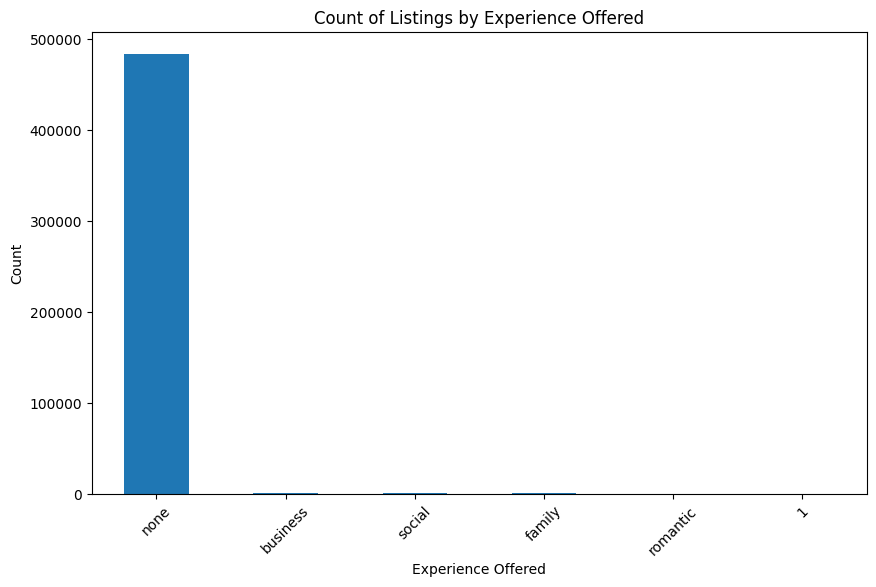

In [24]:
experience_counts = df_target['Experiences Offered'].value_counts()
# Plot for 'Experiences Offered' column
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar')
plt.title('Count of Listings by Experience Offered')
plt.xlabel('Experience Offered')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
df_target.drop('Experiences Offered', axis=1, inplace=True)

<ipython-input-25-633df44ad9ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target.drop('Experiences Offered', axis=1, inplace=True)


In [26]:
df_target.shape

(486974, 21)

## 8.Handling unusual value in the column Room Type

In [27]:
df_target['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', '9'],
      dtype=object)

In [28]:
# checking for the number of '9' variables present in the column 'Room Type'
(df_target['Room Type']=='9').sum()

1

In [29]:
df_target_1=df_target[df_target['Room Type']!='9']

In [30]:
df_target_1.shape

(486973, 21)

## 9.Dropping NaN values in attributes having less no of Records

In [31]:
df_target_1.isna().sum()

Host Response Rate             112670
Host Total Listings Count         490
Room Type                           0
Property Type                      10
Accommodates                       61
Bathrooms                        1502
Bedrooms                          622
Beds                              901
Bed Type                            0
Amenities                        4374
Price                               0
Cleaning Fee                   176373
Extra People                       19
Minimum Nights                      0
Number of Reviews                   0
Review Scores Rating           124552
Review Scores Cleanliness      125201
Review Scores Checkin          125753
Review Scores Communication    125245
Review Scores Location         125702
Cancellation Policy                 0
dtype: int64

In [32]:
columns_to_consider = ['Property Type', 'Accommodates', 'Extra People']
df_target_1 = df_target_1.dropna(subset=columns_to_consider)

In [33]:
df_target_1.isna().sum()

Host Response Rate             112657
Host Total Listings Count         490
Room Type                           0
Property Type                       0
Accommodates                        0
Bathrooms                        1501
Bedrooms                          622
Beds                              901
Bed Type                            0
Amenities                        4372
Price                               0
Cleaning Fee                   176346
Extra People                        0
Minimum Nights                      0
Number of Reviews                   0
Review Scores Rating           124531
Review Scores Cleanliness      125180
Review Scores Checkin          125732
Review Scores Communication    125224
Review Scores Location         125681
Cancellation Policy                 0
dtype: int64

Handling Cleaning Fees

In [34]:
df_target_1.shape

(486883, 21)

In [35]:
df_target_5 = df_target_1

## 10.Filling null values using mean

In [36]:
# Fill nulls with the mean for these columns in df_target_5
df_target_5['Bathrooms'].fillna(df_target_5['Bathrooms'].mean(), inplace=True)
df_target_5['Bedrooms'].fillna(df_target_5['Bedrooms'].mean(), inplace=True)
df_target_5['Beds'].fillna(df_target_5['Beds'].mean(), inplace=True)
df_target_5['Host Total Listings Count'].fillna(df_target_5['Host Total Listings Count'].mean(), inplace=True)
print(df_target_5.isnull().sum())


Host Response Rate             112657
Host Total Listings Count           0
Room Type                           0
Property Type                       0
Accommodates                        0
Bathrooms                           0
Bedrooms                            0
Beds                                0
Bed Type                            0
Amenities                        4372
Price                               0
Cleaning Fee                   176346
Extra People                        0
Minimum Nights                      0
Number of Reviews                   0
Review Scores Rating           124531
Review Scores Cleanliness      125180
Review Scores Checkin          125732
Review Scores Communication    125224
Review Scores Location         125681
Cancellation Policy                 0
dtype: int64


In [37]:
df_target_5.head(5)

Host Response Rate  Host Total Listings Count        Room Type  \
0                 NaN                        1.0     Private room   
1               100.0                        1.0  Entire home/apt   
2               100.0                        3.0     Private room   
3               100.0                        1.0  Entire home/apt   
4               100.0                        1.0  Entire home/apt   

     Property Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0        Apartment           1.0        1.0       1.0   1.0  Real Bed   
1        Apartment           2.0        1.0       1.0   1.0  Real Bed   
2  Bed & Breakfast           2.0        1.0       1.0   1.0  Real Bed   
3        Apartment           4.0        1.0       2.0   3.0  Real Bed   
4        Apartment           2.0        1.0       1.0   1.0  Real Bed   

                                           Amenities  ...  Cleaning Fee  \
0  Internet,Wireless Internet,Kitchen,Heating,Was...  ...           NaN   
1  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...          15.0   
2  TV,Internet,Wireless Internet,Breakfast,Heatin...  ...           NaN   
3  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...          50.0   
4  Wireless Internet,Kitchen,Hot tub,Buzzer/wirel...  ...           NaN   

   Extra People  Minimum Nights  Number of Reviews  Review Scores Rating  \
0           0.0             1.0                3.0                  90.0   
1          40.0             2.0               16.0                  99.0   
2           0.0             2.0                0.0                   NaN   
3          40.0            12.0                1.0                 100.0   
4          15.0             4.0               12.0                  96.0   

   Review Scores Cleanliness  Review Scores Checkin  \
0                        9.0                   10.0   
1                       10.0                   10.0   
2                        NaN                    NaN   
3                       10.0                   10.0   
4                        9.0                   10.0   

   Review Scores Communication  Review Scores Location  Cancellation Policy  
0                          9.0                     9.0             flexible  
1                         10.0                    10.0             moderate  
2                          NaN                     NaN               strict  
3                         10.0                    10.0               strict  
4                          9.0                    10.0               strict  

[5 rows x 21 columns]

## 11.Filling null values using K-means Clustering

In [38]:
# Filling in the null values using K-Means clustering
features = ['Host Response Rate','Review Scores Rating', 'Review Scores Cleanliness',
            'Review Scores Checkin', 'Review Scores Communication',
            'Review Scores Location','Cleaning Fee']
missing_data = df_target_5[features][df_target_5[features].isnull().any(axis=1)]
data_for_clustering = df_target_5[features].dropna()
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data_for_clustering)
missing_data['Cluster'] = kmeans.predict(missing_data.fillna(data_for_clustering.mean()))
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
for feature in features:
    missing_data[feature] = missing_data.apply(lambda row: cluster_centers.at[row['Cluster'], feature], axis=1)
df_target_5.update(missing_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
df_target_5.isnull().sum()

Host Response Rate                0
Host Total Listings Count         0
Room Type                         0
Property Type                     0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                      4372
Price                             0
Cleaning Fee                      0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Cancellation Policy               0
dtype: int64

In [40]:
df_target_5.head(10)

Host Response Rate  Host Total Listings Count        Room Type  \
0           95.801193                        1.0     Private room   
1          100.000000                        1.0  Entire home/apt   
2           95.801193                        3.0     Private room   
3          100.000000                        1.0  Entire home/apt   
4           95.801193                        1.0  Entire home/apt   
5           95.801193                        1.0     Private room   
6           95.726117                        1.0  Entire home/apt   
7          100.000000                        0.0  Entire home/apt   
8           95.801193                        1.0  Entire home/apt   
9           95.801193                        2.0  Entire home/apt   

     Property Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0        Apartment           1.0        1.0       1.0   1.0  Real Bed   
1        Apartment           2.0        1.0       1.0   1.0  Real Bed   
2  Bed & Breakfast           2.0        1.0       1.0   1.0  Real Bed   
3        Apartment           4.0        1.0       2.0   3.0  Real Bed   
4        Apartment           2.0        1.0       1.0   1.0  Real Bed   
5        Apartment           2.0        1.0       1.0   1.0  Real Bed   
6        Townhouse           6.0        1.0       4.0   4.0  Real Bed   
7        Apartment           2.0        1.0       1.0   1.0  Real Bed   
8            House           5.0        1.0       2.0   4.0  Real Bed   
9        Apartment           4.0        1.0       2.0   2.0  Real Bed   

                                           Amenities  ...  Cleaning Fee  \
0  Internet,Wireless Internet,Kitchen,Heating,Was...  ...     55.440484   
1  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...     15.000000   
2  TV,Internet,Wireless Internet,Breakfast,Heatin...  ...     55.440484   
3  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...     50.000000   
4  Wireless Internet,Kitchen,Hot tub,Buzzer/wirel...  ...     55.440484   
5  TV,Wireless Internet,Heating,Family/kid friend...  ...     55.440484   
6  TV,Wireless Internet,Kitchen,Heating,Family/ki...  ...    113.757512   
7  TV,Internet,Wireless Internet,Kitchen,Heating,...  ...     35.000000   
8  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...     55.440484   
9  TV,Internet,Wireless Internet,Kitchen,Heating,...  ...     55.440484   

   Extra People  Minimum Nights  Number of Reviews  Review Scores Rating  \
0           0.0             1.0                3.0             93.395301   
1          40.0             2.0               16.0             99.000000   
2           0.0             2.0                0.0             93.395301   
3          40.0            12.0                1.0            100.000000   
4          15.0             4.0               12.0             93.395301   
5           0.0             2.0                6.0             93.395301   
6           0.0             5.0                0.0             93.728639   
7           0.0             3.0                1.0            100.000000   
8          50.0             5.0                2.0             93.395301   
9           0.0             1.0                2.0             93.395301   

   Review Scores Cleanliness  Review Scores Checkin  \
0                   9.437060               9.711925   
1                  10.000000              10.000000   
2                   9.437060               9.711925   
3                  10.000000              10.000000   
4                   9.437060               9.711925   
5                   9.437060               9.711925   
6                   9.463045               9.716378   
7                  10.000000              10.000000   
8                   9.437060               9.711925   
9                   9.437060               9.711925   

   Review Scores Communication  Review Scores Location  Cancellation Policy  
0                     9.734589                9.569131             flexible  
1             

In [41]:
df_target_6 = df_target_5

In [42]:
df_target_6.isna().sum()

Host Response Rate                0
Host Total Listings Count         0
Room Type                         0
Property Type                     0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                      4372
Price                             0
Cleaning Fee                      0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Cancellation Policy               0
dtype: int64

## 12.Type casting float to int

In [43]:
#Type casting all the float values to integer
float_columns = ['Host Response Rate', 'Host Total Listings Count', 'Accommodates', 'Bathrooms',
                 'Bedrooms', 'Beds', 'Price', 'Cleaning Fee','Extra People','Minimum Nights', 'Number of Reviews',
                 'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Checkin',
                 'Review Scores Communication', 'Review Scores Location']

for col in float_columns:
    df_target_6[col] = df_target_6[col].astype(int)


In [44]:
df_target_6.head()

Host Response Rate  Host Total Listings Count        Room Type  \
0                  95                          1     Private room   
1                 100                          1  Entire home/apt   
2                  95                          3     Private room   
3                 100                          1  Entire home/apt   
4                  95                          1  Entire home/apt   

     Property Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0        Apartment             1          1         1     1  Real Bed   
1        Apartment             2          1         1     1  Real Bed   
2  Bed & Breakfast             2          1         1     1  Real Bed   
3        Apartment             4          1         2     3  Real Bed   
4        Apartment             2          1         1     1  Real Bed   

                                           Amenities  ...  Cleaning Fee  \
0  Internet,Wireless Internet,Kitchen,Heating,Was...  ...            55   
1  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...            15   
2  TV,Internet,Wireless Internet,Breakfast,Heatin...  ...            55   
3  TV,Cable TV,Internet,Wireless Internet,Kitchen...  ...            50   
4  Wireless Internet,Kitchen,Hot tub,Buzzer/wirel...  ...            55   

   Extra People  Minimum Nights  Number of Reviews  Review Scores Rating  \
0             0               1                  3                    93   
1            40               2                 16                    99   
2             0               2                  0                    93   
3            40              12                  1                   100   
4            15               4                 12                    93   

   Review Scores Cleanliness  Review Scores Checkin  \
0                          9                      9   
1                         10                     10   
2                          9                      9   
3                         10                     10   
4                          9                      9   

   Review Scores Communication  Review Scores Location  Cancellation Policy  
0                            9                       9             flexible  
1                           10                      10             moderate  
2                            9                       9               strict  
3                           10                      10               strict  
4                            9                       9               strict  

[5 rows x 21 columns]

In [45]:
df_target_7 = df_target_6

In [46]:
df_target_7.isna().sum()

Host Response Rate                0
Host Total Listings Count         0
Room Type                         0
Property Type                     0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                      4372
Price                             0
Cleaning Fee                      0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Cancellation Policy               0
dtype: int64

## 13.Scaling of values

In [47]:
df_target_7['Review_rating'] = df_target_7['Review Scores Rating']//10
df_target_7['Host_Response_Rate'] = df_target_7['Host Response Rate']//10
df_target_7.drop(['Review Scores Rating', 'Host Response Rate'], axis=1, inplace=True)

In [48]:
df_target_7.head()

Host Total Listings Count        Room Type    Property Type  Accommodates  \
0                          1     Private room        Apartment             1   
1                          1  Entire home/apt        Apartment             2   
2                          3     Private room  Bed & Breakfast             2   
3                          1  Entire home/apt        Apartment             4   
4                          1  Entire home/apt        Apartment             2   

   Bathrooms  Bedrooms  Beds  Bed Type  \
0          1         1     1  Real Bed   
1          1         1     1  Real Bed   
2          1         1     1  Real Bed   
3          1         2     3  Real Bed   
4          1         1     1  Real Bed   

                                           Amenities  Price  ...  \
0  Internet,Wireless Internet,Kitchen,Heating,Was...     50  ...   
1  TV,Cable TV,Internet,Wireless Internet,Kitchen...     95  ...   
2  TV,Internet,Wireless Internet,Breakfast,Heatin...    160  ...   
3  TV,Cable TV,Internet,Wireless Internet,Kitchen...    175  ...   
4  Wireless Internet,Kitchen,Hot tub,Buzzer/wirel...    100  ...   

   Extra People  Minimum Nights  Number of Reviews  Review Scores Cleanliness  \
0             0               1                  3                          9   
1            40               2                 16                         10   
2             0               2                  0                          9   
3            40              12                  1                         10   
4            15               4                 12                          9   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                      9                            9                       9   
1                     10                           10                      10   
2                      9                            9                       9   
3                     10                           10                      10   
4                      9                            9                       9   

   Cancellation Policy Review_rating  Host_Response_Rate  
0             flexible             9                   9  
1             moderate             9                  10  
2               strict             9                   9  
3               strict            10                  10  
4               strict             9                   9  

[5 rows x 21 columns]

In [49]:
df_target_8 = df_target_7

In [50]:
df_target_8.isna().sum()

Host Total Listings Count         0
Room Type                         0
Property Type                     0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                      4372
Price                             0
Cleaning Fee                      0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Cancellation Policy               0
Review_rating                     0
Host_Response_Rate                0
dtype: int64

In [51]:
df_target_8.dtypes

Host Total Listings Count       int64
Room Type                      object
Property Type                  object
Accommodates                    int64
Bathrooms                       int64
Bedrooms                        int64
Beds                            int64
Bed Type                       object
Amenities                      object
Price                           int64
Cleaning Fee                    int64
Extra People                    int64
Minimum Nights                  int64
Number of Reviews               int64
Review Scores Cleanliness       int64
Review Scores Checkin           int64
Review Scores Communication     int64
Review Scores Location          int64
Cancellation Policy            object
Review_rating                   int64
Host_Response_Rate              int64
dtype: object

In [52]:
df_target_8.shape

(486883, 21)

# Exploratory data analysis

## 1.Analyzing the Distribution of Attributes




In [53]:
Numerical_col=['Host Total Listings Count',
 'Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Price',
 'Cleaning Fee',
 'Extra People',
 'Minimum Nights',
 'Number of Reviews',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location']

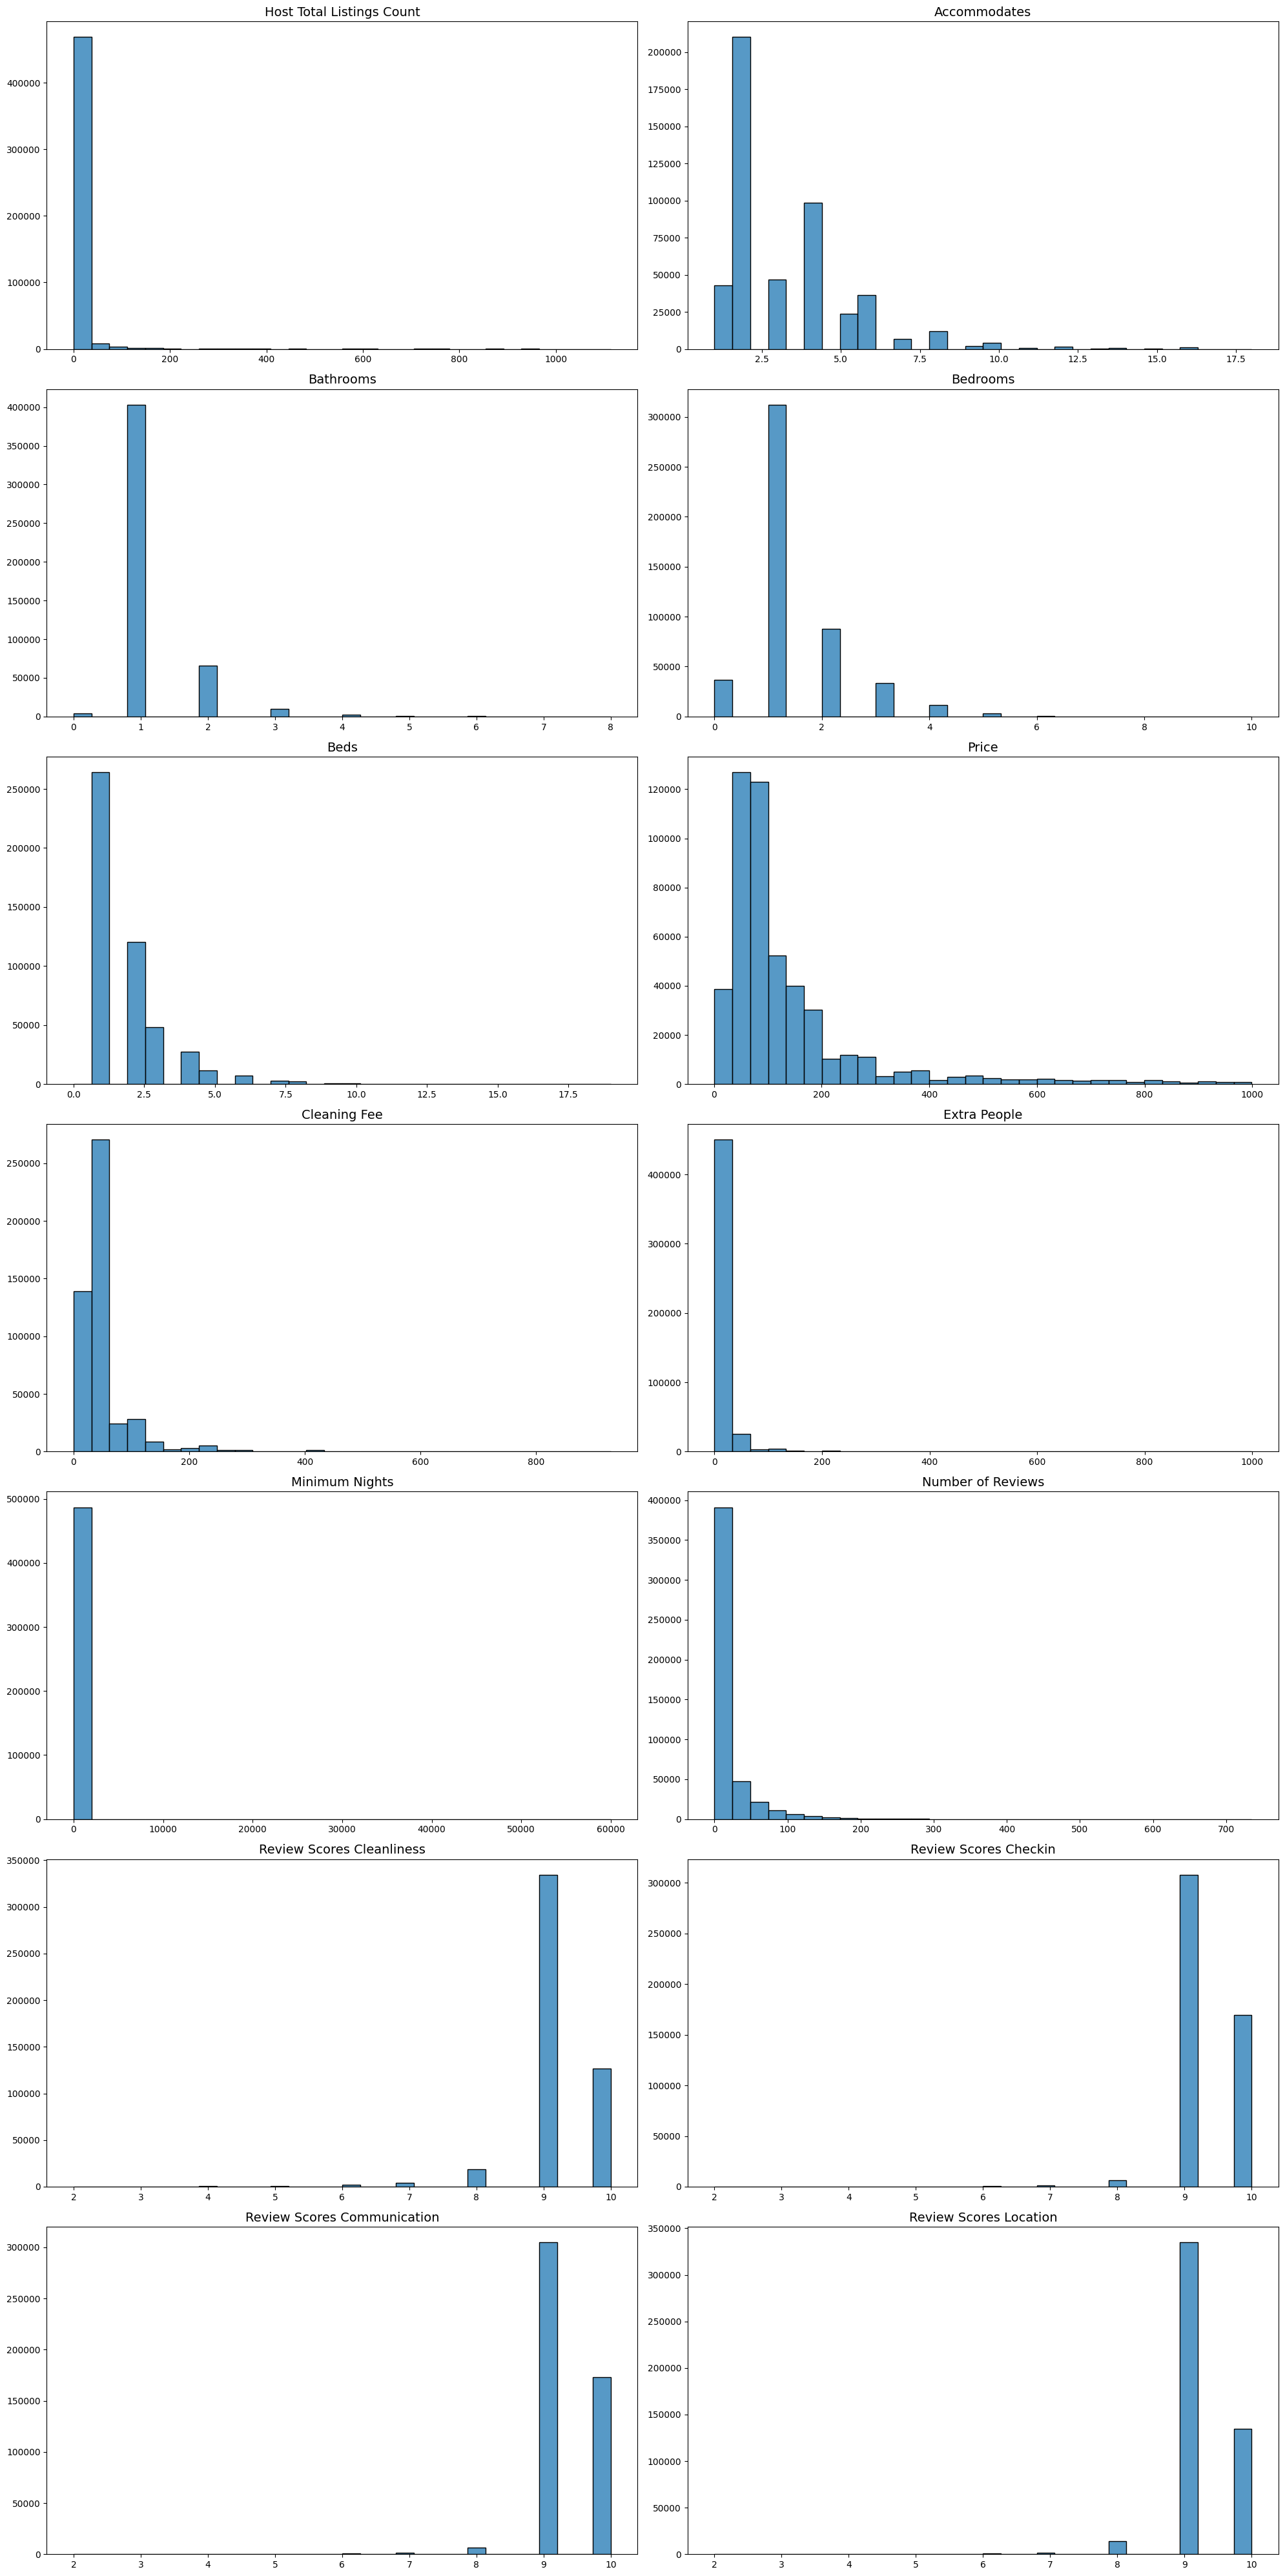

In [54]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(Numerical_col):
    sns.histplot(df_target_8[col], bins=30, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

## 2.Analysing number of categorical values in Property Type attributes

In [55]:
df_target_8['Property Type'].unique()

array(['Apartment', 'Bed & Breakfast', 'Townhouse', 'House', 'Loft',
       'Condominium', 'Guesthouse', 'Timeshare', 'Boutique hotel',
       'Villa', 'Serviced apartment', 'Dorm', 'Bungalow', 'Camper/RV',
       'Lighthouse', 'Treehouse', 'Other', 'Boat', 'Hostel', 'Cabin',
       'Guest suite', 'Hut', 'In-law', 'Castle', 'Yurt', 'Tent',
       'Vacation home', 'Chalet', 'Earth House', 'Tipi', 'Nature lodge',
       'Train', 'Cave', 'Entire Floor', 'Island', 'Igloo',
       'Casa particular', 'Parking Space', 'Ryokan (Japan)',
       'Pension (Korea)', 'Car', 'Plane', 'Van', 'Heritage hotel (India)'],
      dtype=object)

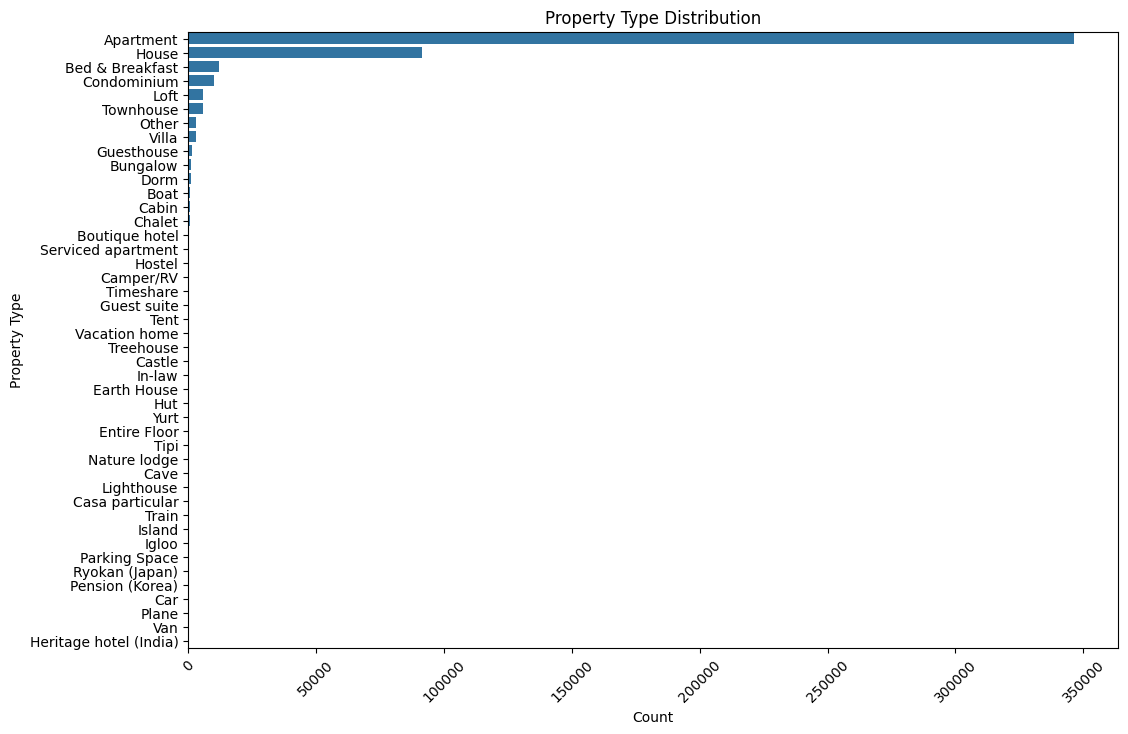

In [56]:
plt.figure(figsize=(12, 8))
sns.countplot(y=df_target_8['Property Type'], order = df_target_8['Property Type'].value_counts().index)
plt.title('Property Type Distribution')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.xticks(rotation=45)
plt.show()

## 3.Categorising a bunch of data to limited objects

In [57]:
# Categorizing the entire 'Property Type' column into "5" unique objects namely- 'Apartments','Exotic', 'Traditional', 'Luxe' and 'Creative Spaces' based on their similarities
categories = {
    'Apartments': ['Apartment', 'Serviced apartment'],
    'Exotic': ['Lighthouse', 'Treehouse', 'Boat', 'Yurt', 'Tipi', 'Cave', 'Igloo', 'Island', 'Van', 'Earth House'],
    'Traditional': ['Bed & Breakfast', 'Townhouse', 'House', 'Guesthouse', 'Dorm', 'Cabin', 'Hut', 'Chalet',
                    'Casa particular', 'Ryokan (Japan)', 'Pension (Korea)', 'Heritage hotel (India)', 'Loft', 'In-law', 'Hostel'],
    'Luxe': ['Timeshare', 'Boutique hotel', 'Castle', 'Condominium', 'Villa', 'Bungalow', 'Guest suite', 'Vacation home'],
    'Creative Spaces': ['Camper/RV', 'Tent', 'Nature lodge', 'Train', 'Entire Floor', 'Parking Space', 'Car', 'Plane', 'Other']
}

# Function to map each property type to its new category
def map_property_type_to_category(property_type):
    for category, types in categories.items():
        if property_type in types:
            return category

df_target_8['Category'] = df_target_8['Property Type'].apply(map_property_type_to_category)
df_target_8['Category'].unique()


array(['Apartments', 'Traditional', 'Luxe', 'Creative Spaces', 'Exotic'],
      dtype=object)

In [58]:
# Dropping the 'Property Type' Column
df_target_8.drop('Property Type', axis=1, inplace=True)

## 4.Visualization using Pie chart for the column 'Category' to analyse the distribution

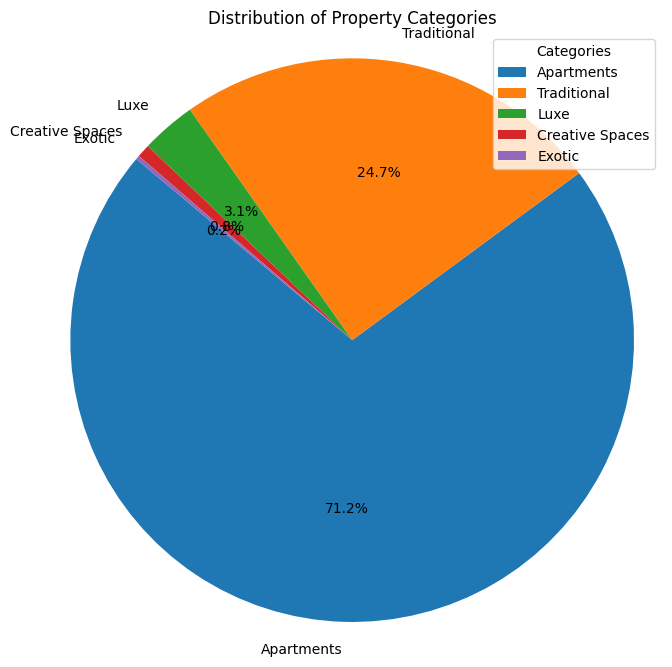

In [59]:
category_counts = df_target_8['Category'].value_counts()

# Plot the pie chart for the new column 'Category'
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Categories')
plt.legend(category_counts.index, title="Categories", loc="best")
plt.axis('equal')
plt.show()


In [60]:
# Analysing the 'Bed Type' column
df_target_8["Bed Type"].unique()

array(['Real Bed', 'Pull-out Sofa', 'Airbed', 'Futon', 'Couch'],
      dtype=object)

## 5.Generalizng the category using mapping to reduce the complexity of the dataset

In [61]:
# Analysing the 'Cancellation Policy' column
df_target_8["Cancellation Policy"].unique()

array(['flexible', 'moderate', 'strict', 'super_strict_30',
       'super_strict_60', 'moderate_new', 'flexible_new', 'strict_new',
       'super_strict_30_new', 'super_strict_60_new', 'no_refunds',
       'long_term'], dtype=object)

In [62]:
df_target_11=df_target_8

In [63]:
df_target_11.isna().sum()

Host Total Listings Count         0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                      4372
Price                             0
Cleaning Fee                      0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Cancellation Policy               0
Review_rating                     0
Host_Response_Rate                0
Category                          0
dtype: int64

In [64]:
categories = {
    'Flexible': ['flexible', 'flexible_new','long_term'],
    'Strict': ['strict', 'super_strict_30','super_strict_60','strict_new','super_strict_30_new', 'super_strict_60_new', 'no_refunds'],
    'Moderate': ['moderate','moderate_new']
}

# Function to map each property type to its new category
def map_cancellation_policy_to_category(mapping_type):
    for category, types in categories.items():
        if mapping_type in types:
            return category

df_target_11['Cancellation Type'] = df_target_11['Cancellation Policy'].apply(map_cancellation_policy_to_category)
df_target_11['Cancellation Type'].unique()


array(['Flexible', 'Moderate', 'Strict'], dtype=object)

In [65]:
df_target_11.shape

(486883, 22)

In [66]:
# Dropping the 'Cancellation Policy' Column
df_target_11.drop('Cancellation Policy', axis=1, inplace=True)

In [67]:
df_target_12 = df_target_11

In [68]:
df_target_12.head()

Host Total Listings Count        Room Type  Accommodates  Bathrooms  \
0                          1     Private room             1          1   
1                          1  Entire home/apt             2          1   
2                          3     Private room             2          1   
3                          1  Entire home/apt             4          1   
4                          1  Entire home/apt             2          1   

   Bedrooms  Beds  Bed Type  \
0         1     1  Real Bed   
1         1     1  Real Bed   
2         1     1  Real Bed   
3         2     3  Real Bed   
4         1     1  Real Bed   

                                           Amenities  Price  Cleaning Fee  \
0  Internet,Wireless Internet,Kitchen,Heating,Was...     50            55   
1  TV,Cable TV,Internet,Wireless Internet,Kitchen...     95            15   
2  TV,Internet,Wireless Internet,Breakfast,Heatin...    160            55   
3  TV,Cable TV,Internet,Wireless Internet,Kitchen...    175            50   
4  Wireless Internet,Kitchen,Hot tub,Buzzer/wirel...    100            55   

   ...  Minimum Nights  Number of Reviews  Review Scores Cleanliness  \
0  ...               1                  3                          9   
1  ...               2                 16                         10   
2  ...               2                  0                          9   
3  ...              12                  1                         10   
4  ...               4                 12                          9   

   Review Scores Checkin  Review Scores Communication  Review Scores Location  \
0                      9                            9                       9   
1                     10                           10                      10   
2                      9                            9                       9   
3                     10                           10                      10   
4                      9                            9                       9   

   Review_rating  Host_Response_Rate     Category Cancellation Type  
0              9                   9   Apartments          Flexible  
1              9                  10   Apartments          Moderate  
2              9                   9  Traditional            Strict  
3             10                  10   Apartments            Strict  
4              9                   9   Apartments            Strict  

[5 rows x 21 columns]

In [69]:
df_target_12.isna().sum()

Host Total Listings Count         0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                      4372
Price                             0
Cleaning Fee                      0
Extra People                      0
Minimum Nights                    0
Number of Reviews                 0
Review Scores Cleanliness         0
Review Scores Checkin             0
Review Scores Communication       0
Review Scores Location            0
Review_rating                     0
Host_Response_Rate                0
Category                          0
Cancellation Type                 0
dtype: int64

## 6.Gaining insights for the column 'Cancellation Type' using bar graph

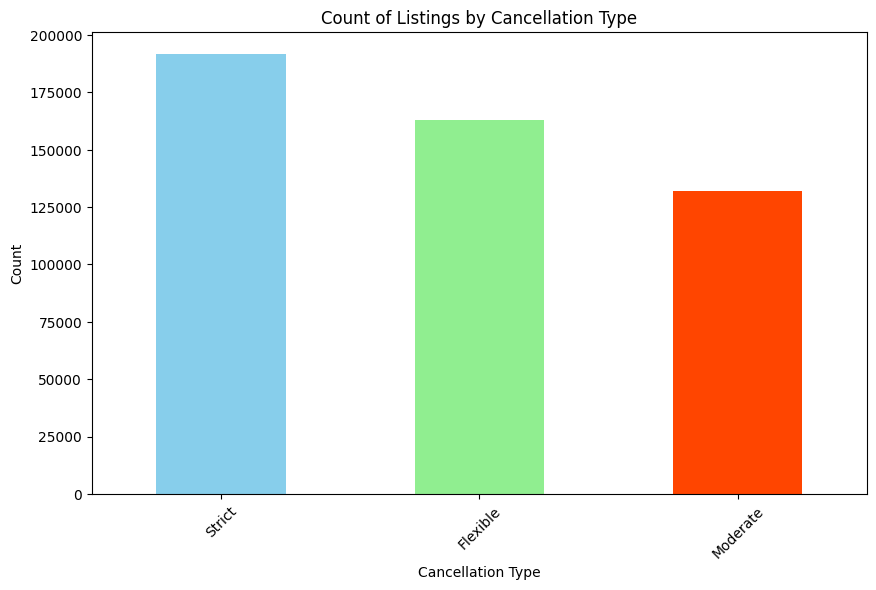

In [70]:
can_counts = df_target_12['Cancellation Type'].value_counts()
# Plot for the new column 'Cancellation Type'
plt.figure(figsize=(10, 6))
can_counts.plot(kind='bar',color=['skyblue', 'lightgreen', 'orangered'])
plt.title('Count of Listings by Cancellation Type')
plt.xlabel('Cancellation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 7.Analyzing Text Data in Amenities

In [71]:
# Analysing the 'Amenities' column
df_target_12['Amenities'].unique().tolist()

['Internet,Wireless Internet,Kitchen,Heating,Washer,Essentials',
 'TV,Cable TV,Internet,Wireless Internet,Kitchen,Buzzer/wireless intercom,Heating,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50',
 'TV,Internet,Wireless Internet,Breakfast,Heating,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo',
 'TV,Cable TV,Internet,Wireless Internet,Kitchen,Breakfast,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace',
 'Wireless Internet,Kitchen,Hot tub,Buzzer/wireless intercom,Heating,Washer,Iron,Laptop friendly workspace,Private entrance',
 'TV,Wireless Internet,Heating,Family/kid friendly,Washer,Smoke detector,Essentials,Shampoo,Hangers,Hair dryer,Lapt

In [72]:
 # Removing the null values in the 'Amenities' column
df_target_13 = df_target_12

In [73]:
df_target_13.columns

Index(['Host Total Listings Count', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Extra People', 'Minimum Nights', 'Number of Reviews',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review_rating', 'Host_Response_Rate', 'Category', 'Cancellation Type'],
      dtype='object')

## 8.Fetching top 20 essential Amenities

In [74]:
df_target_13['Amenities_List'] = df_target_13['Amenities'].apply(lambda x: str(x).split(','))

In [75]:
amenities_counter = Counter(
    amenity.lower()
    for amenities_list in df_target_13['Amenities']
    for amenity in str(amenities_list).split(',')
)

# Find the top 20 most common amenities
top_20_amenities = amenities_counter.most_common(20)
print(top_20_amenities)


[('wireless internet', 456255), ('kitchen', 445087), ('heating', 432683), ('essentials', 414425), ('washer', 356816), ('tv', 342961), ('smoke detector', 302230), ('internet', 301700), ('shampoo', 286523), ('hangers', 285860), ('family/kid friendly', 278636), ('hair dryer', 265397), ('iron', 260634), ('laptop friendly workspace', 241573), ('dryer', 208885), ('air conditioning', 194728), ('carbon monoxide detector', 162924), ('elevator in building', 149417), ('fire extinguisher', 148025), ('first aid kit', 145542)]


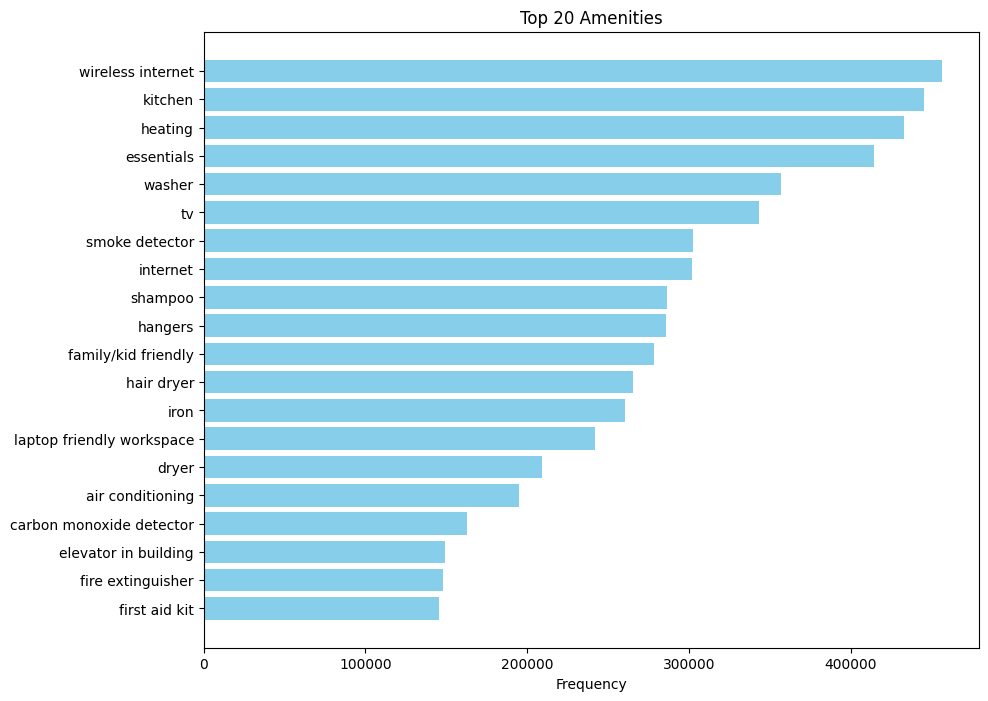

In [76]:
amenities, counts = zip(*top_20_amenities)
plt.figure(figsize=(10, 8))
plt.barh(amenities, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Amenities')
plt.gca().invert_yaxis()
plt.show()

In [77]:
df_target_13.columns

Index(['Host Total Listings Count', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Extra People', 'Minimum Nights', 'Number of Reviews',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review_rating', 'Host_Response_Rate', 'Category', 'Cancellation Type',
       'Amenities_List'],
      dtype='object')

## 9.Calculating the Amenities score based on the top 20 essential amenities

In [78]:
top_20_amenities= [amenity[0] for amenity in top_20_amenities]


In [79]:
# Function to calculate the amenities score
def calculate_amenities_score(amenities_list):
    amenities_list = [amenity.lower() for amenity in amenities_list]
    score = sum(0.5 for amenity in top_20_amenities if amenity in amenities_list)
    return score
df_target_13['Amenities_Score'] = df_target_13['Amenities_List'].apply(calculate_amenities_score)
df_target_13[['Amenities_List', 'Amenities_Score']].head(100)

Amenities_List  Amenities_Score
0   [Internet, Wireless Internet, Kitchen, Heating...              3.0
1   [TV, Cable TV, Internet, Wireless Internet, Ki...              7.5
2   [TV, Internet, Wireless Internet, Breakfast, H...              4.5
3   [TV, Cable TV, Internet, Wireless Internet, Ki...              8.0
4   [Wireless Internet, Kitchen, Hot tub, Buzzer/w...              3.0
..                                                ...              ...
95  [TV, Wireless Internet, Air conditioning, Kitc...              8.5
96  [TV, Internet, Wireless Internet, Air conditio...              5.0
97  [Internet, Wireless Internet, Air conditioning...              7.0
98  [TV, Cable TV, Internet, Wireless Internet, Ai...              9.0
99  [TV, Internet, Wireless Internet, Air conditio...              9.0

[100 rows x 2 columns]

In [80]:
df_target_13.columns

Index(['Host Total Listings Count', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price', 'Cleaning Fee',
       'Extra People', 'Minimum Nights', 'Number of Reviews',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review_rating', 'Host_Response_Rate', 'Category', 'Cancellation Type',
       'Amenities_List', 'Amenities_Score'],
      dtype='object')

In [81]:
df_target_13.drop(['Amenities', 'Amenities_List'], axis=1, inplace=True)

In [82]:
df_target_13.dtypes

Host Total Listings Count        int64
Room Type                       object
Accommodates                     int64
Bathrooms                        int64
Bedrooms                         int64
Beds                             int64
Bed Type                        object
Price                            int64
Cleaning Fee                     int64
Extra People                     int64
Minimum Nights                   int64
Number of Reviews                int64
Review Scores Cleanliness        int64
Review Scores Checkin            int64
Review Scores Communication      int64
Review Scores Location           int64
Review_rating                    int64
Host_Response_Rate               int64
Category                        object
Cancellation Type               object
Amenities_Score                float64
dtype: object

In [83]:
df_target_14=df_target_13

In [84]:
df_target_14.shape

(486883, 21)

In [85]:
#Checking for the remaining null values
df_target_14.isna().sum()

Host Total Listings Count      0
Room Type                      0
Accommodates                   0
Bathrooms                      0
Bedrooms                       0
Beds                           0
Bed Type                       0
Price                          0
Cleaning Fee                   0
Extra People                   0
Minimum Nights                 0
Number of Reviews              0
Review Scores Cleanliness      0
Review Scores Checkin          0
Review Scores Communication    0
Review Scores Location         0
Review_rating                  0
Host_Response_Rate             0
Category                       0
Cancellation Type              0
Amenities_Score                0
dtype: int64

## 14.Encoding the cateogries with set of values. ( Data Cleaning)

In [86]:
category= {
    'Apartments': 0,
    'Traditional': 1,
    'Luxe': 2,
    'Creative Spaces': 3,
    'Exotic': 4
}

df_target_14['Category'] = df_target_14['Category'].replace(category)

bedtype = {
    'Real Bed': 0,
    'Futon': 1,
    'Airbed': 2,
    'Pull-out Sofa': 3,
    'Couch': 4
}

df_target_14['Bed Type'] = df_target_14['Bed Type'].replace(bedtype)

roomtype ={
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
}

df_target_14['Room Type'] = df_target_14['Room Type'].replace(roomtype)

cancellationtype ={
    'Strict': 0,
    'Flexible': 1,
    'Moderate': 2
}

df_target_14['Cancellation Type'] = df_target_14['Cancellation Type'].replace(cancellationtype)


In [87]:
df_target_14.head()

Host Total Listings Count  Room Type  Accommodates  Bathrooms  Bedrooms  \
0                          1          1             1          1         1   
1                          1          0             2          1         1   
2                          3          1             2          1         1   
3                          1          0             4          1         2   
4                          1          0             2          1         1   

   Beds  Bed Type  Price  Cleaning Fee  Extra People  ...  Number of Reviews  \
0     1         0     50            55             0  ...                  3   
1     1         0     95            15            40  ...                 16   
2     1         0    160            55             0  ...                  0   
3     3         0    175            50            40  ...                  1   
4     1         0    100            55            15  ...                 12   

   Review Scores Cleanliness  Review Scores Checkin  \
0                          9                      9   
1                         10                     10   
2                          9                      9   
3                         10                     10   
4                          9                      9   

   Review Scores Communication  Review Scores Location  Review_rating  \
0                            9                       9              9   
1                           10                      10              9   
2                            9                       9              9   
3                           10                      10             10   
4                            9                       9              9   

   Host_Response_Rate  Category  Cancellation Type  Amenities_Score  
0                   9         0                  1              3.0  
1                  10         0                  2              7.5  
2                   9         1                  0              4.5  
3                  10         0                  0              8.0  
4                   9         0                  0              3.0  

[5 rows x 21 columns]

## 10.Correlation plot (Multivariate Analysis)


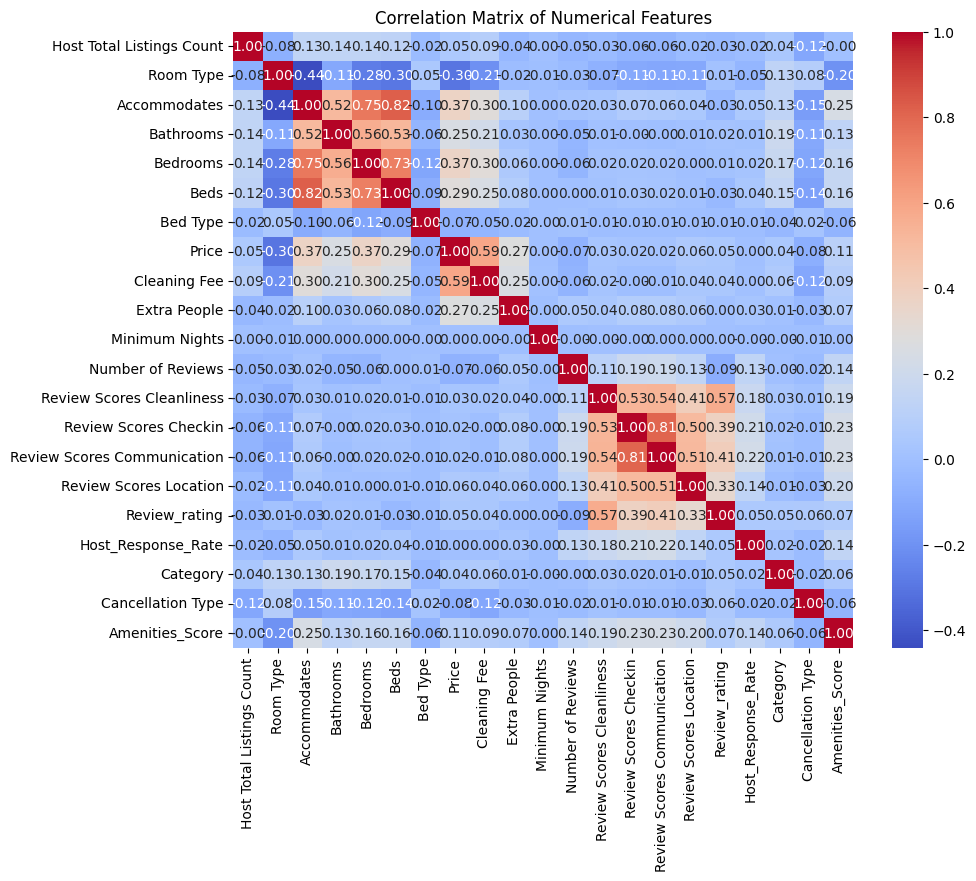

In [88]:
numerical_df = df_target_14.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

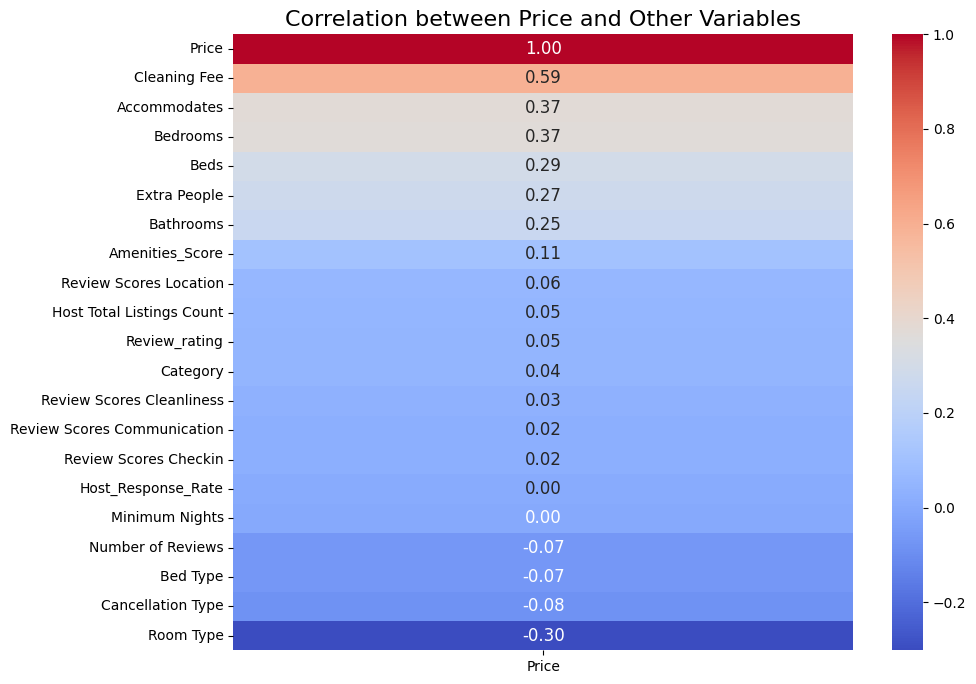

In [89]:
# Calculate the correlation matrix
correlation_matrix = df_target_14.corr()

# Select the correlations only for the 'Price' variable
price_correlation = correlation_matrix[['Price']]

# Plot the correlation heatmap for the 'Price' variable
plt.figure(figsize=(10, 8))
sns.heatmap(price_correlation.sort_values(by='Price', ascending=False),
            cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation between Price and Other Variables', fontsize=16)
plt.show()

## 11.Analyzing the Outliers

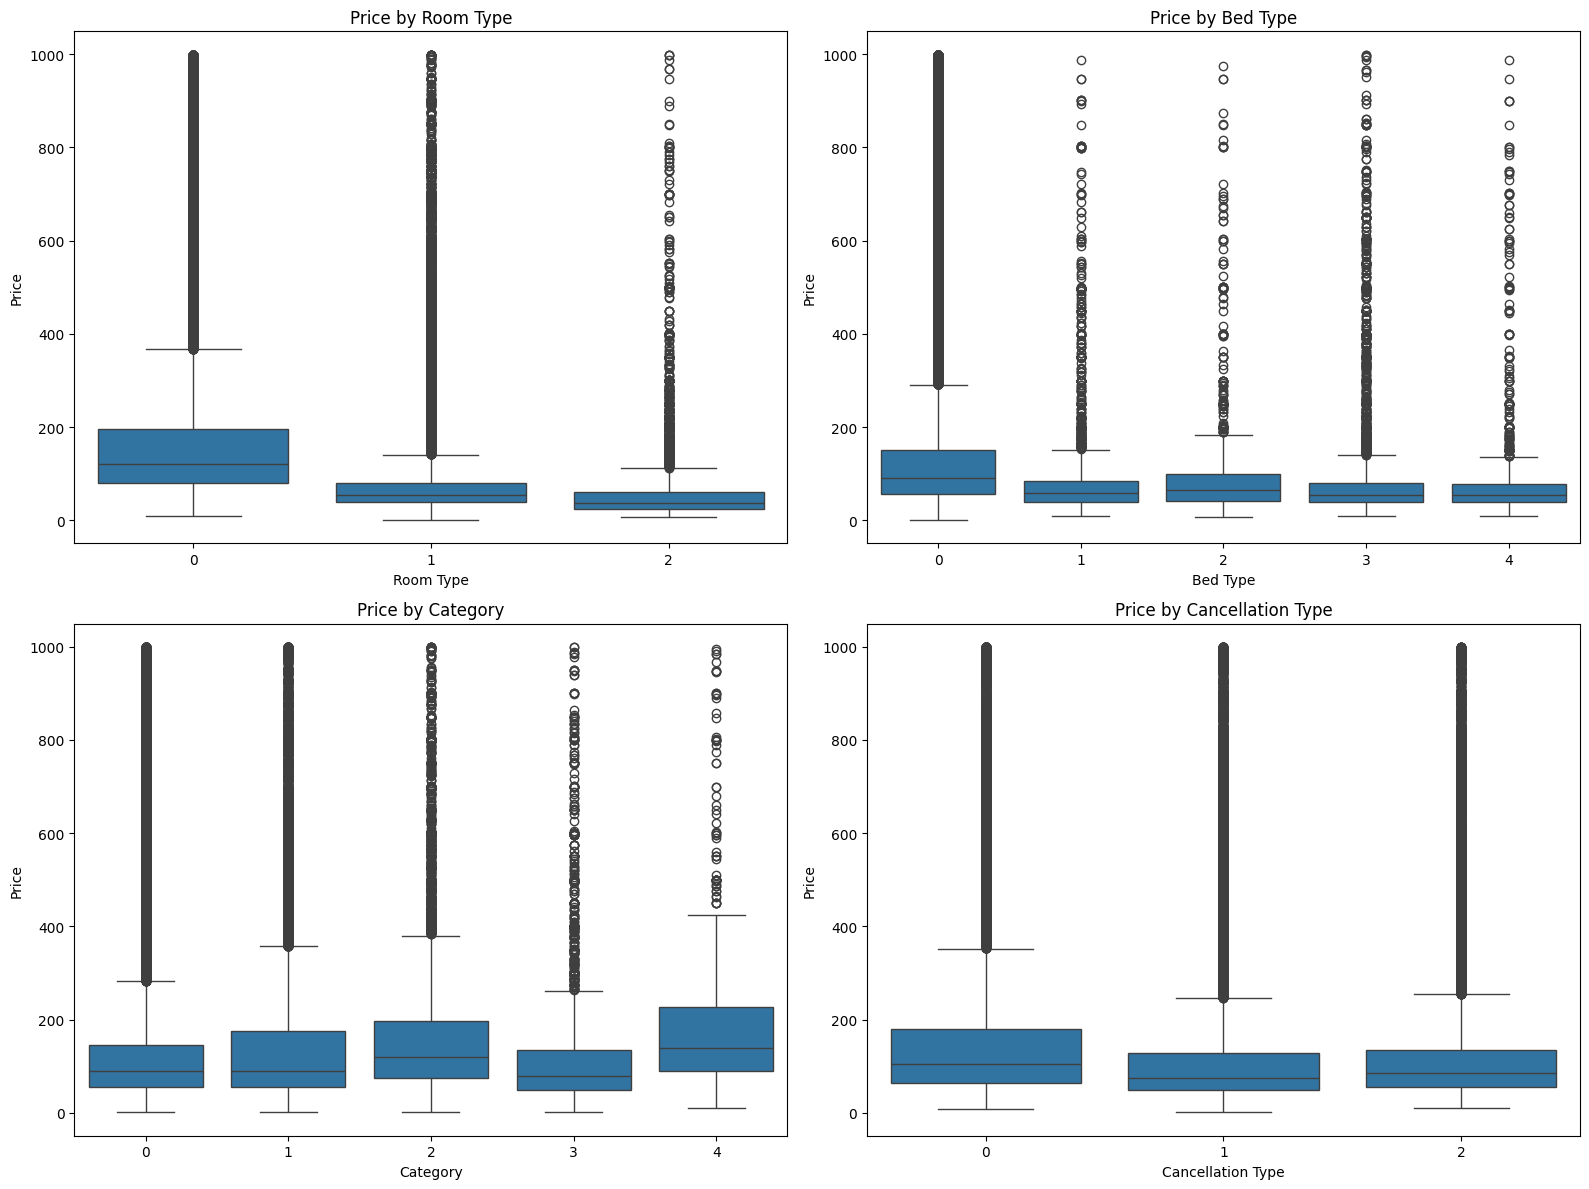

In [90]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Price by Room Type
sns.boxplot(x='Room Type', y='Price', data=df_target_14, ax=axes[0, 0])
axes[0, 0].set_title('Price by Room Type')

# Price by Bed Type
sns.boxplot(x='Bed Type', y='Price', data=df_target_14, ax=axes[0, 1])
axes[0, 1].set_title('Price by Bed Type')

# Price by Category
sns.boxplot(x='Category', y='Price', data=df_target_14, ax=axes[1, 0])
axes[1, 0].set_title('Price by Category')

# Price by Cancellation Type
sns.boxplot(x='Cancellation Type', y='Price', data=df_target_14, ax=axes[1, 1])
axes[1, 1].set_title('Price by Cancellation Type')

plt.tight_layout()
plt.show()

## 12.Scatter Plot againt Price (Univariate Analysis)

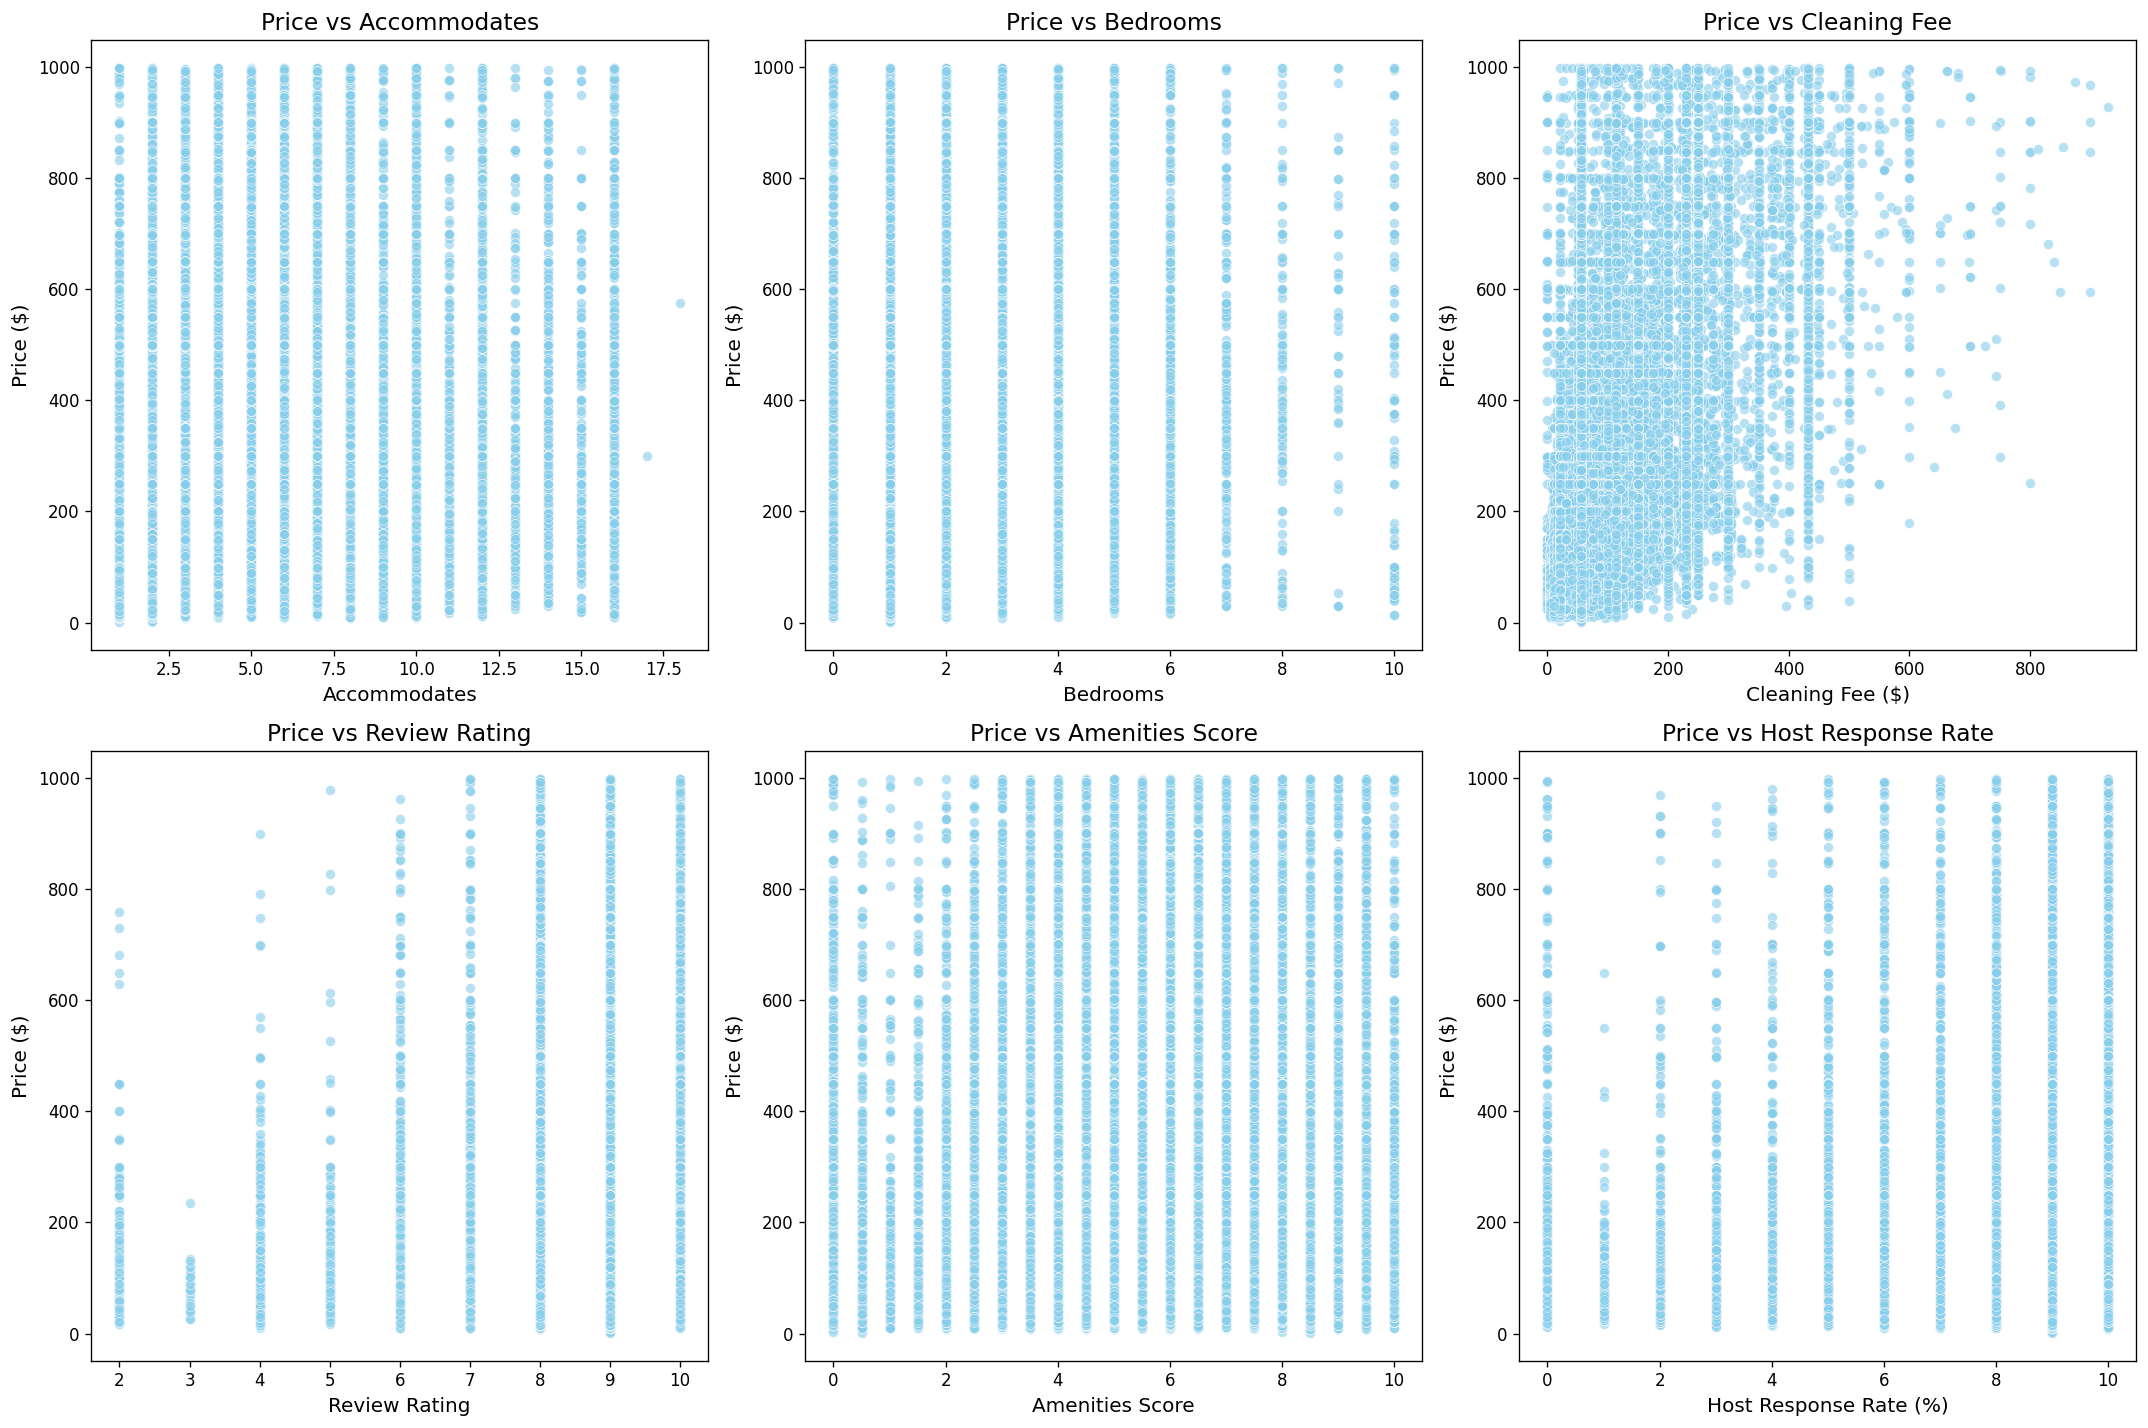

In [91]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), dpi=120)

color = 'skyblue'
marker = 'o'

# Price versus Accommodates
sns.scatterplot(x='Accommodates', y='Price', data=df_target_14, ax=axes[0, 0], color=color, marker=marker, alpha=0.6)
axes[0, 0].set_title('Price vs Accommodates', fontsize=14)
axes[0, 0].set_xlabel('Accommodates', fontsize=12)
axes[0, 0].set_ylabel('Price ($)', fontsize=12)

# Price versus Bedrooms
sns.scatterplot(x='Bedrooms', y='Price', data=df_target_14, ax=axes[0, 1], color=color, marker=marker, alpha=0.6)
axes[0, 1].set_title('Price vs Bedrooms', fontsize=14)
axes[0, 1].set_xlabel('Bedrooms', fontsize=12)
axes[0, 1].set_ylabel('Price ($)', fontsize=12)

# Price versus Cleaning Fee
sns.scatterplot(x='Cleaning Fee', y='Price', data=df_target_14, ax=axes[0, 2], color=color, marker=marker, alpha=0.6)
axes[0, 2].set_title('Price vs Cleaning Fee', fontsize=14)
axes[0, 2].set_xlabel('Cleaning Fee ($)', fontsize=12)
axes[0, 2].set_ylabel('Price ($)', fontsize=12)

# Price versus Review Scores
sns.scatterplot(x='Review_rating', y='Price', data=df_target_14, ax=axes[1, 0], color=color, marker=marker, alpha=0.6)
axes[1, 0].set_title('Price vs Review Rating', fontsize=14)
axes[1, 0].set_xlabel('Review Rating', fontsize=12)
axes[1, 0].set_ylabel('Price ($)', fontsize=12)

# Price versus Amenities Score
sns.scatterplot(x='Amenities_Score', y='Price', data=df_target_14, ax=axes[1, 1], color=color, marker=marker, alpha=0.6)
axes[1, 1].set_title('Price vs Amenities Score', fontsize=14)
axes[1, 1].set_xlabel('Amenities Score', fontsize=12)
axes[1, 1].set_ylabel('Price ($)', fontsize=12)

# Price versus Host Response Rate
sns.scatterplot(x='Host_Response_Rate', y='Price', data=df_target_14, ax=axes[1, 2], color=color, marker=marker, alpha=0.6)
axes[1, 2].set_title('Price vs Host Response Rate', fontsize=14)
axes[1, 2].set_xlabel('Host Response Rate (%)', fontsize=12)
axes[1, 2].set_ylabel('Price ($)', fontsize=12)


plt.tight_layout()
plt.show()

In [92]:
# csv_file_path = '/content/drive/MyDrive/DIC project/airbnb_final.csv'
# df_target_14.to_csv(csv_file_path, index=False)

# csv_file_path

## 13.Statistical Analysis

In [93]:
df_target_14.describe()

Host Total Listings Count      Room Type   Accommodates      Bathrooms  \
count              486883.000000  486883.000000  486883.000000  486883.000000   
mean                    9.582304       0.389743       3.266475       1.195957   
std                    57.469960       0.523874       2.035334       0.552151   
min                     0.000000       0.000000       1.000000       0.000000   
25%                     1.000000       0.000000       2.000000       1.000000   
50%                     1.000000       0.000000       2.000000       1.000000   
75%                     3.000000       1.000000       4.000000       1.000000   
max                  1114.000000       2.000000      18.000000       8.000000   

            Bedrooms           Beds       Bed Type          Price  \
count  486883.000000  486883.000000  486883.000000  486883.000000   
mean        1.355907       1.905029       0.088939     138.063438   
std         0.903209       1.450256       0.505233     149.653073   
min         0.000000       0.000000       0.000000       1.000000   
25%         1.000000       1.000000       0.000000      55.000000   
50%         1.000000       1.000000       0.000000      90.000000   
75%         2.000000       2.000000       0.000000     150.000000   
max        10.000000      19.000000       4.000000     999.000000   

        Cleaning Fee   Extra People  ...  Number of Reviews  \
count  486883.000000  486883.000000  ...      486883.000000   
mean       56.484878      11.244330  ...          16.880318   
std        49.374226      27.053459  ...          32.507212   
min         0.000000       0.000000  ...           0.000000   
25%        30.000000       0.000000  ...           1.000000   
50%        55.000000       0.000000  ...           4.000000   
75%        55.000000      15.000000  ...          18.000000   
max       929.000000     999.000000  ...         735.000000   

       Review Scores Cleanliness  Review Scores Checkin  \
count              486883.000000          486883.000000   
mean                    9.177868               9.318274   
std                     0.641293               0.570244   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                     9.000000               9.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       Review Scores Communication  Review Scores Location  Review_rating  \
count                486883.000000           486883.000000  486883.000000   
mean                      9.324899                9.228461       8.980034   
std                       0.573275                0.558294       0.552628   
min                       2.000000                2.000000       2.000000   
25%                       9.000000                9.000000       9.000000   
50%                       9.000000                9.000000       9.000000   
75%                      10.000000               10.000000       9.000000   
max                      10.000000               10.000000      10.000000   

       Host_Response_Rate       Category  Cancellation Type  Amenities_Score  
count       486883.000000  486883.000000      486883.000000    486883.000000  
mean             9.191761       0.341090           0.877607         5.832892  
std              0.997322       0.599713           0.806315         1.957198  
min              0.000000       0.000000           0.000000         0.000000  
25%              9.000000       0.000000           0.000000         4.500000  
50%              9.000000       0.000000           1.000000         6.000000  
75%             10.000000       1.000000           2.000000         7.500000  
max             10.000000       4.000000           2.000000        10.000000  

[8 rows x 21 columns]

In [94]:
df_target_14.to_csv('cleaned_data.csv', index=False)

# TRAINING AND TESTING OF MODELS

df_target_14 = pd.read_csv('cleaned_data.csv')

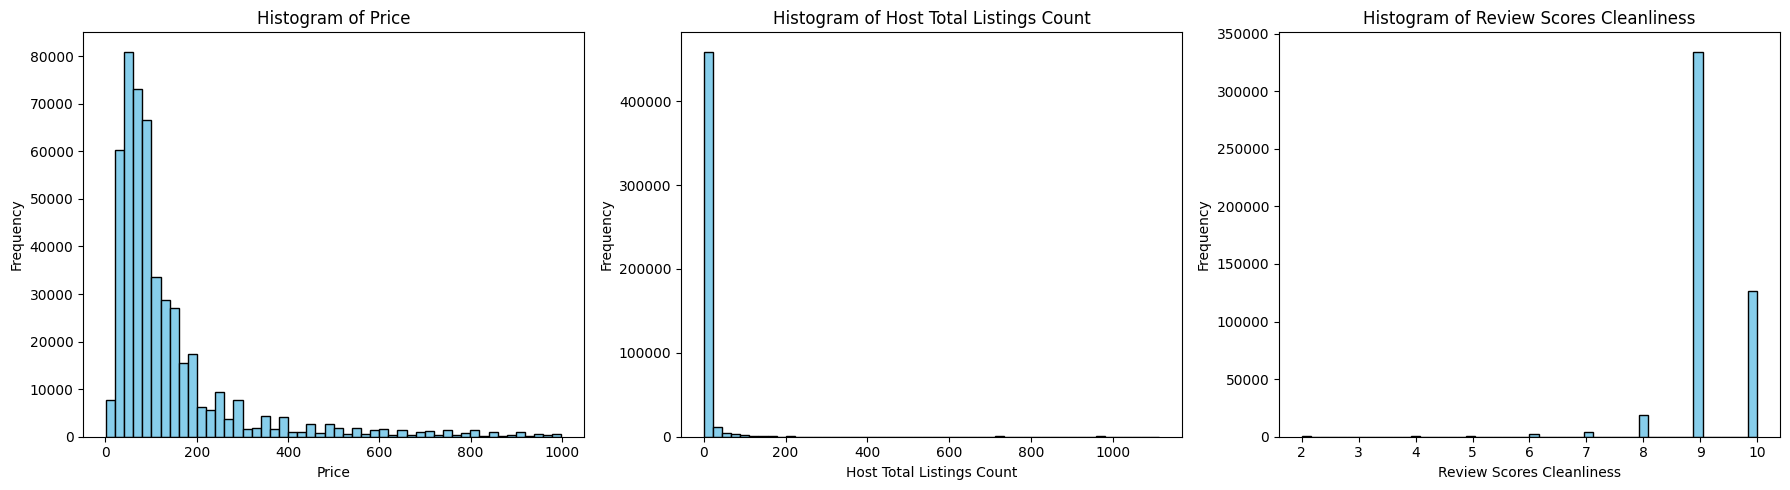

In [95]:
x  = ['Price', 'Host Total Listings Count', 'Review Scores Cleanliness']
plt.figure(figsize=(18, 5))
for i, var in enumerate(x, 1):
    plt.subplot(1, len(x), i)
    plt.hist(df_target_14[var], bins=50, color='skyblue', edgecolor='black')
    plt.title('Histogram of {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

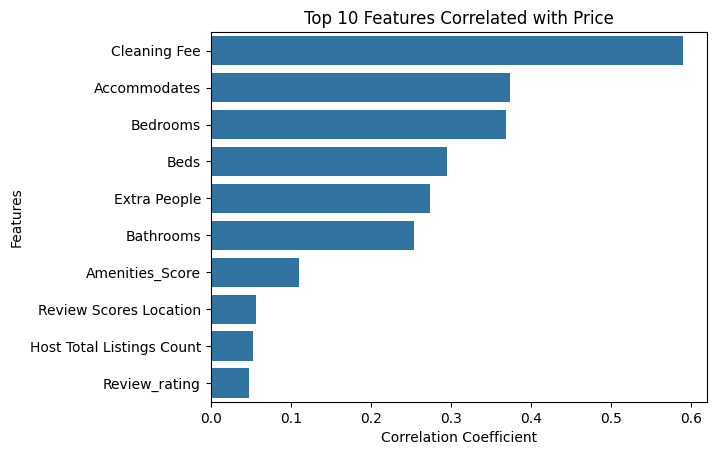

In [96]:
correlation_matrix = df_target_14.corr()
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
top_10_positive_correlations = price_correlations.head(11)[1:]
sns.barplot(x=top_10_positive_correlations.values, y=top_10_positive_correlations.index)
plt.title('Top 10 Features Correlated with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [97]:
df_target_14['price_bins'] = pd.qcut(df_target_14['Price'], q=10, labels=False, duplicates='drop')
X = df_target_14.drop(['Price', 'price_bins'], axis=1)
y = df_target_14['Price']

In [98]:
dfsub = df_target_14[0:50000]

In [99]:
df_target_14.columns
df_price=dfsub['Price']

In [100]:
target=dfsub['Price']
features=dfsub.drop(['Price'],axis=1)

In [101]:
features.columns

Index(['Host Total Listings Count', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Cleaning Fee', 'Extra People',
       'Minimum Nights', 'Number of Reviews', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review_rating', 'Host_Response_Rate',
       'Category', 'Cancellation Type', 'Amenities_Score', 'price_bins'],
      dtype='object')

In [102]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.35,random_state=0)

In [103]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
X = df_target_14[['Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Extra People', 'Number of Reviews', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review_rating', 'Host_Response_Rate', 'Amenities_Score']]
y = df_target_14['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
linr2 = r2_score(y_test, y_pred)
rmse_linreg = math.sqrt(lin_mse)
mae_lin = mean_absolute_error(y_test, y_pred)
print("Linear Regression Metrics:")
print("R-squared:", linr2)
print("MAE:",mae_lin)
print("RMSE:", rmse_linreg)

Linear Regression Metrics:
R-squared: 0.4288578632520327
MAE: 66.45070589084185
RMSE: 112.85327642135475


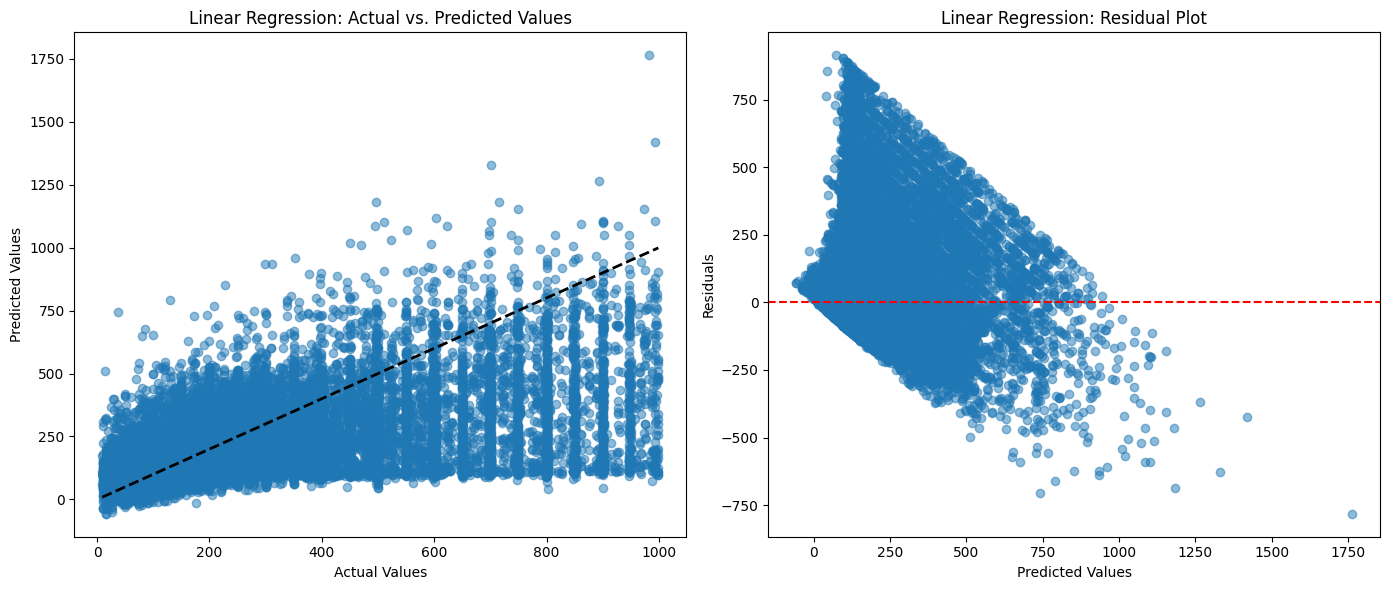

In [105]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.tight_layout()
plt.show()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
lasso_y_pred = lasso_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_adj_r2 = 1 - (1 - ridge_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_ridge = math.sqrt(ridge_mse)
mae_ridge = mean_absolute_error(y_test, y_pred)
print("Ridge Regression Metrics:")
print("R-squared:", ridge_r2)
print("MAE:", mae_ridge)
print("RMSE:",ridge_mse)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_adj_r2 = 1 - (1 - lasso_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_las = math.sqrt(lasso_mse)
mae_las = mean_absolute_error(y_test, y_pred)
print("\nLasso Regression Metrics:")
print("R-squared:", lasso_r2)
print("MAE:", mae_las)
print("RMSE:",rmse_las)

Ridge Regression Metrics:
R-squared: 0.428857862747294
MAE: 66.45070589084185
RMSE: 12735.862010289842

Lasso Regression Metrics:
R-squared: 0.4276092446953653
MAE: 66.45070589084185
RMSE: 112.97656776702043


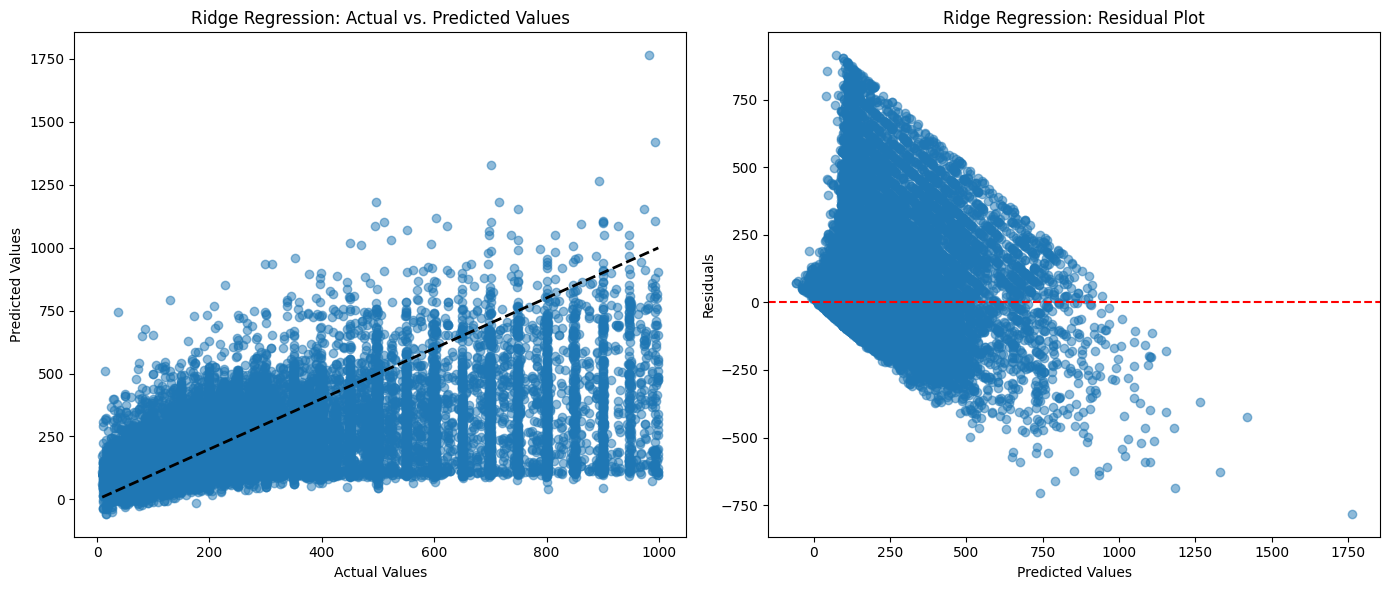

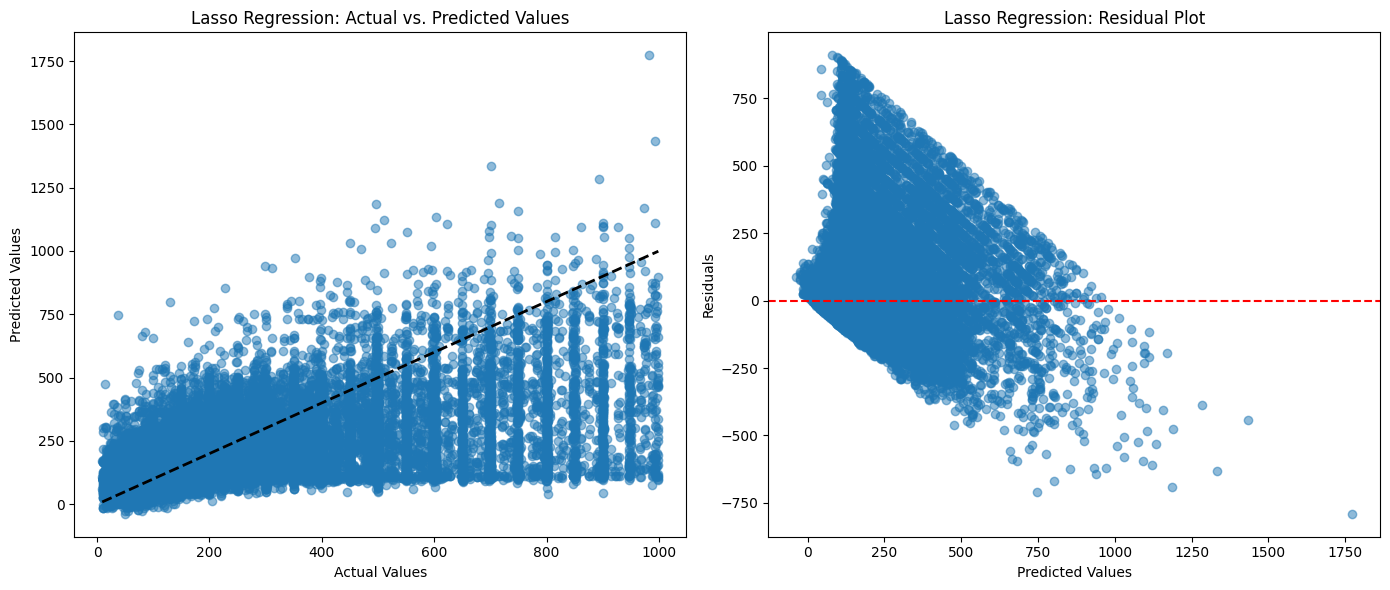

In [107]:
# Scatter Plot for Ridge Regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, ridge_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs. Predicted Values')
# Residual Plot for Ridge Regression
plt.subplot(1, 2, 2)
ridge_residuals = y_test - ridge_y_pred
plt.scatter(ridge_y_pred, ridge_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Regression: Residual Plot')
plt.tight_layout()
plt.show()
# Scatter Plot for Lasso Regression
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lasso_y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs. Predicted Values')
# Residual Plot for Lasso Regression
plt.subplot(1, 2, 2)
lasso_residuals = y_test - lasso_y_pred
plt.scatter(lasso_y_pred, lasso_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Lasso Regression: Residual Plot')
plt.tight_layout()
plt.show()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse_rndfrst = mean_squared_error(y_test, y_pred)
rfr2 = r2_score(y_test, y_pred)
rmse_rndfrst = math.sqrt(mse_rndfrst)
mae_rndfrst = mean_absolute_error(y_test, y_pred)
print("Random Forest Regressor Metrics:")
print("R-squared:", rfr2)
print("MAE:", mae_rndfrst)
print("RMSE:",rmse_rndfrst)

Random Forest Regressor Metrics:
R-squared: 0.4979472600687236
MAE: 59.79350929310777
RMSE: 105.80757040837283


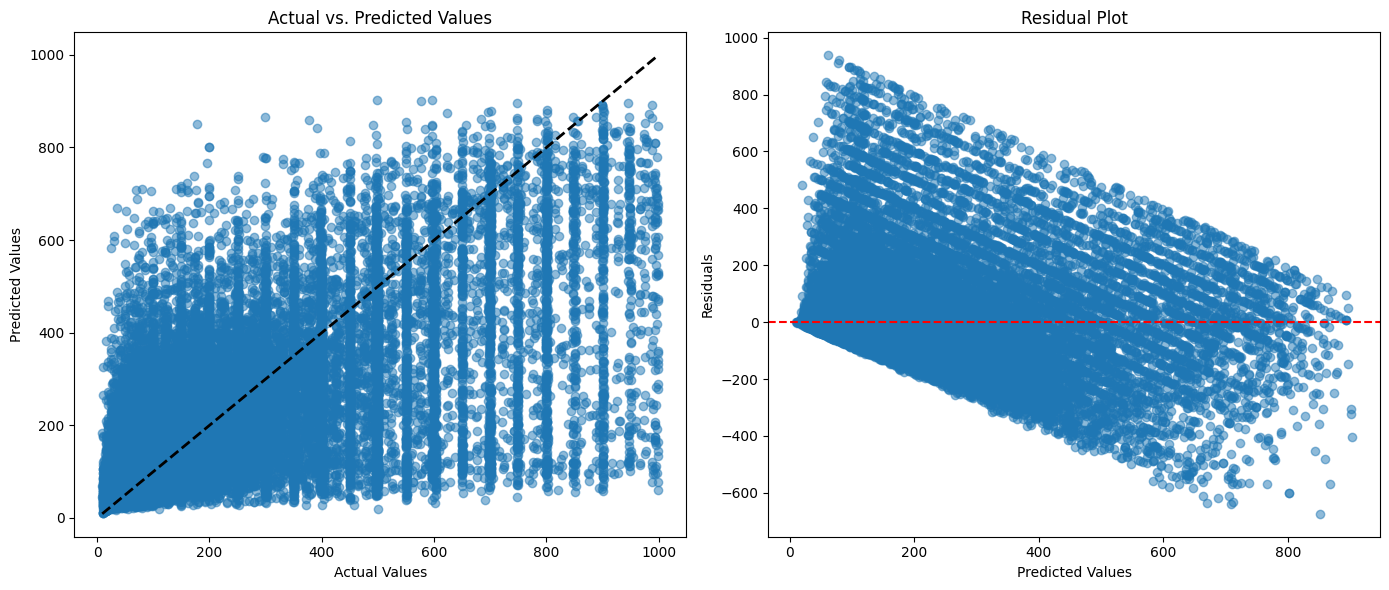

In [109]:
# Scatter Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_state=42)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)
y_pred = catboost_model.predict(X_test)
mse_cat = mean_squared_error(y_test, y_pred)
catr2 = r2_score(y_test, y_pred)
rmse_cat = math.sqrt(mse_cat)
mae_cat = mean_absolute_error(y_test, y_pred)
print("CatBoost Regressor Metrics:")
print("R-squared:", catr2)
print("MAE:" ,mae_cat)
print("RMSE:",rmse_cat)

0:	learn: 143.6200847	test: 143.1736234	best: 143.1736234 (0)	total: 109ms	remaining: 1m 49s
100:	learn: 104.0366966	test: 103.3115431	best: 103.3115431 (100)	total: 4.55s	remaining: 40.5s
200:	learn: 102.8186203	test: 102.3840264	best: 102.3840264 (200)	total: 9.4s	remaining: 37.4s
300:	learn: 102.1612908	test: 101.9905496	best: 101.9905496 (300)	total: 15.6s	remaining: 36.3s
400:	learn: 101.6931459	test: 101.7111388	best: 101.7111388 (400)	total: 19.9s	remaining: 29.7s
500:	learn: 101.3308726	test: 101.5382815	best: 101.5379074 (499)	total: 25.4s	remaining: 25.3s
600:	learn: 101.0182589	test: 101.4114596	best: 101.4114596 (600)	total: 30.8s	remaining: 20.5s
700:	learn: 100.7360850	test: 101.2892484	best: 101.2887650 (699)	total: 35.1s	remaining: 15s
800:	learn: 100.4934599	test: 101.1912304	best: 101.1912304 (800)	total: 41.4s	remaining: 10.3s
900:	learn: 100.2657722	test: 101.0994230	best: 101.0987954 (898)	total: 46.2s	remaining: 5.08s
999:	learn: 100.0770745	test: 101.0303139	best

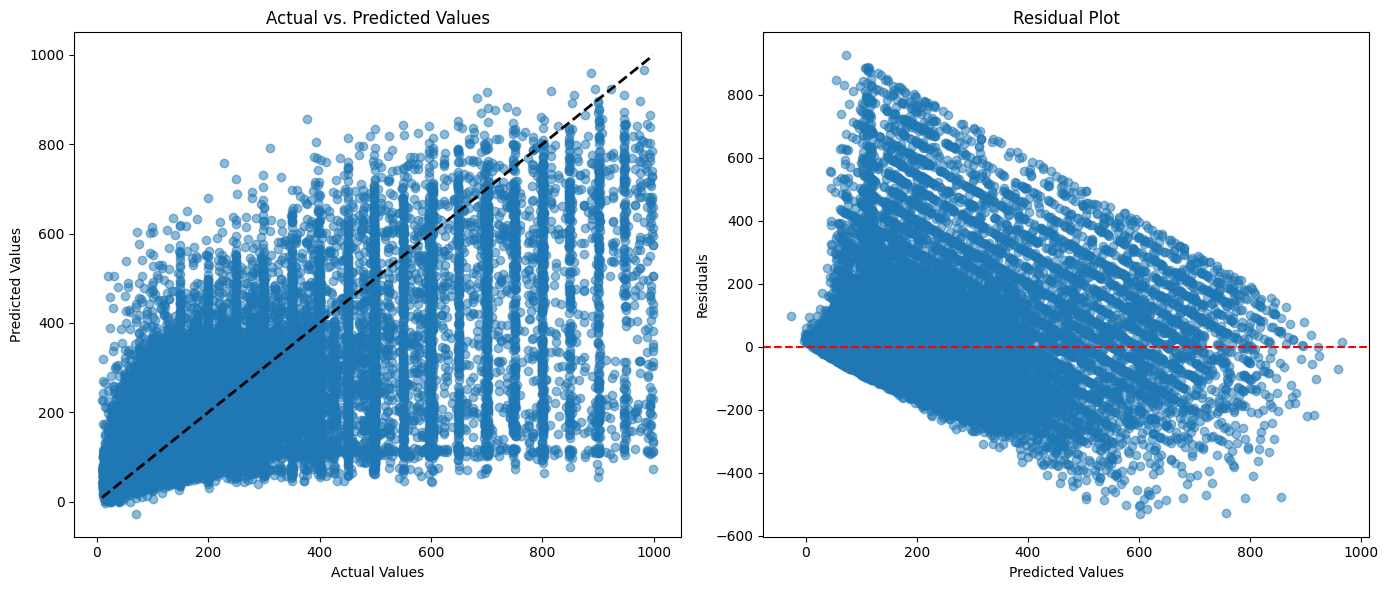

In [111]:
# Scatter Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'early_stopping_rounds': 50
}
num_round = 1000
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
mse_lgb = mean_squared_error(y_test, y_pred)
lgbmr2 = r2_score(y_test, y_pred)
mae_lgb = mean_absolute_error(y_test, y_pred)
rmse_lgbm = math.sqrt(mse_lgb)
print("LightGBM Regressor Metrics:")
print("R-squared:", lgbmr2)
print("MAE:", mae_lgb)
print("RMSE:",rmse_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 389506, number of used features: 15
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 138.132116
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[995]	valid_0's rmse: 100.592
LightGBM Regressor Metrics:
R-squared: 0.5462231549379142
MAE: 56.88637903000907
RMSE: 100.591952272069


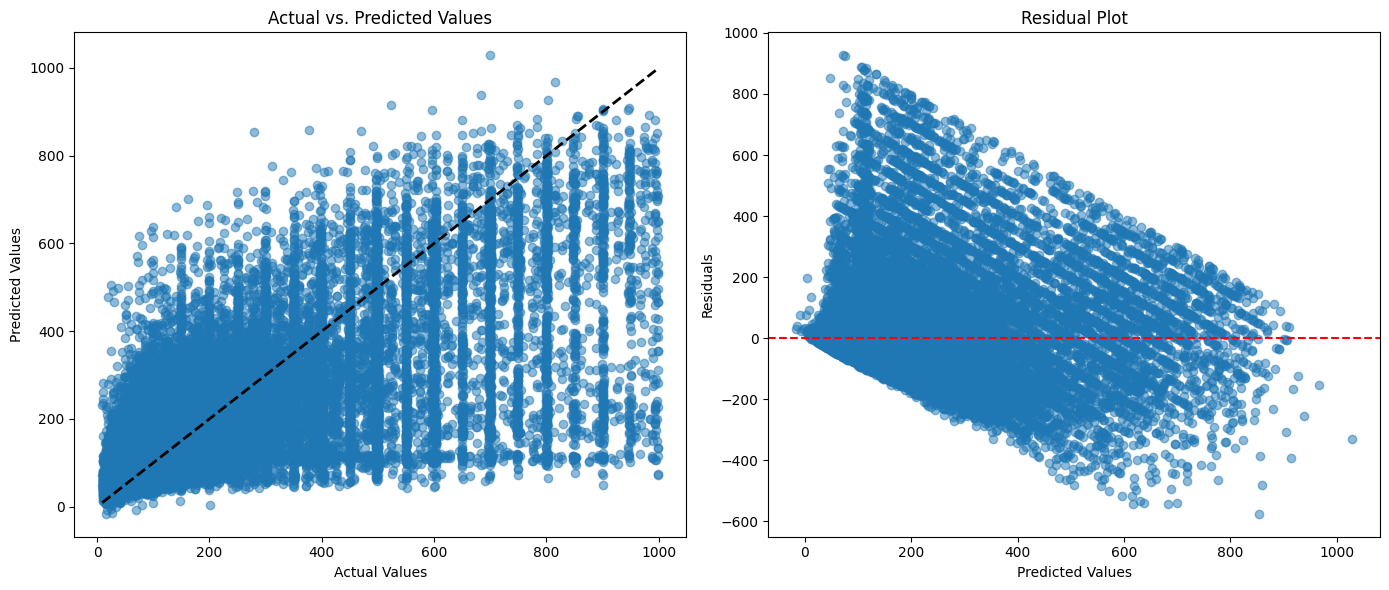

In [114]:
# Scatter Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [115]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.35,random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)
eval_results = model.evaluate(X_test_scaled, y_test, verbose=0)
val_loss, val_mse, val_mae = eval_results
print(f"Validation Loss: {val_loss}, Validation MSE: {val_mse}, Validation MAE: {val_mae}")
from sklearn.metrics import r2_score
y_pred = model.predict(X_test_scaled)
seqr_squared = r2_score(y_test, y_pred)
print("\nSeqquential neural  Metrics:")
print('R-squared:', seqr_squared)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('RMSE:',rmse)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 26057.4824 - mean_absolute_error: 91.8337 - mean_squared_error: 26057.4824 - val_loss: 7378.5303 - val_mean_absolute_error: 45.3772 - val_mean_squared_error: 7378.5303
Epoch 2/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7495.2407 - mean_absolute_error: 46.4774 - mean_squared_error: 7495.2407 - val_loss: 6166.0635 - val_mean_absolute_error: 38.3677 - val_mean_squared_error: 6166.0635
Epoch 3/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6223.9380 - mean_absolute_error: 40.7675 - mean_squared_error: 6223.9380 - val_loss: 5231.3569 - val_mean_absolute_error: 35.6665 - val_mean_squared_error: 5231.3569
Epoch 4/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5588.0112 - mean_absolute_error: 38.1675 - mean_squared_error: 5588.0112 - val_loss: 4856.6104 - val_mean_absolute_error: 33.7940 - val_mean_squared_error: 4856.6104
Epoch 5/100
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5143.2603 - mean_absolute_er

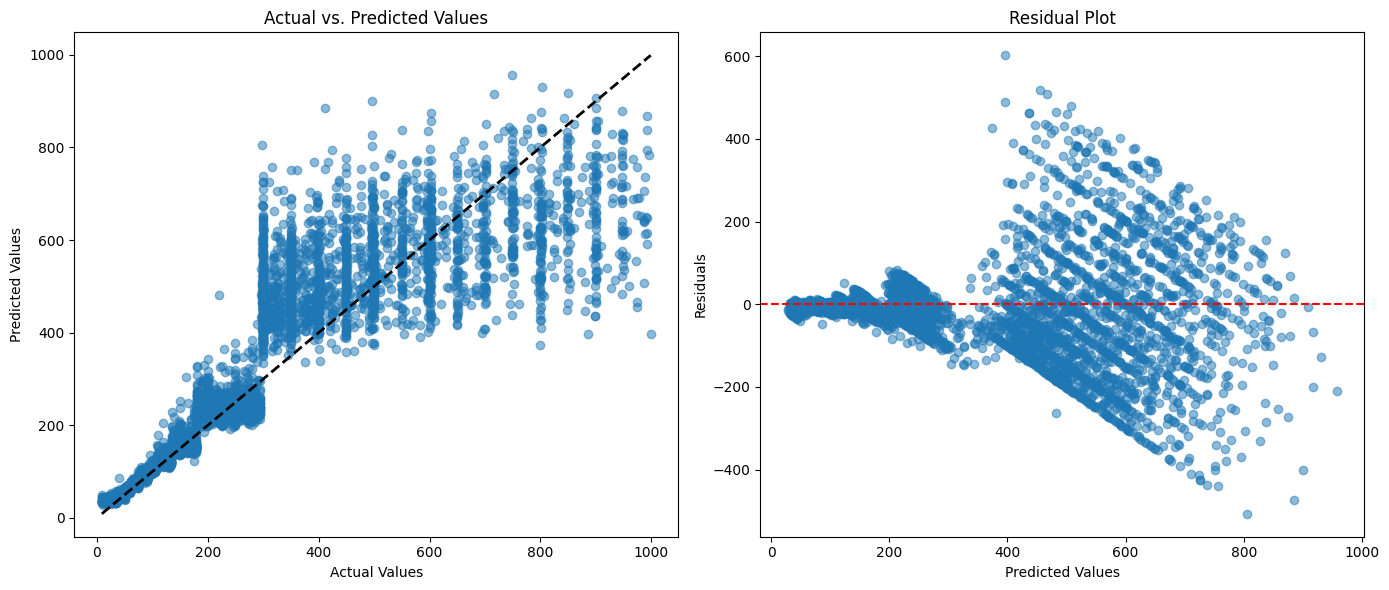

In [116]:
y_pred_flat = y_pred.flatten()
# Scatter Plot
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_flat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_flat
plt.scatter(y_pred_flat, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

In [117]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=7,
    alpha=1,
    n_estimators=1000
)
xgb_model.fit(X_train_scaled, y_train)
predictions_xgb = xgb_model.predict(X_test_scaled)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)
r2_xgb = r2_score(y_test, predictions_xgb)
rmse_xgb = math.sqrt(mse_xgb)
print('XGBoost Regressor Metrics:')
print('R-Squared:' ,r2_xgb)
print('MAE:' ,mae_xgb)
print('RMSE:',rmse_xgb)

XGBoost Regressor Metrics:
R-Squared: 0.8855637301831589
MAE: 21.93159908289228
RMSE: 55.838943690052005


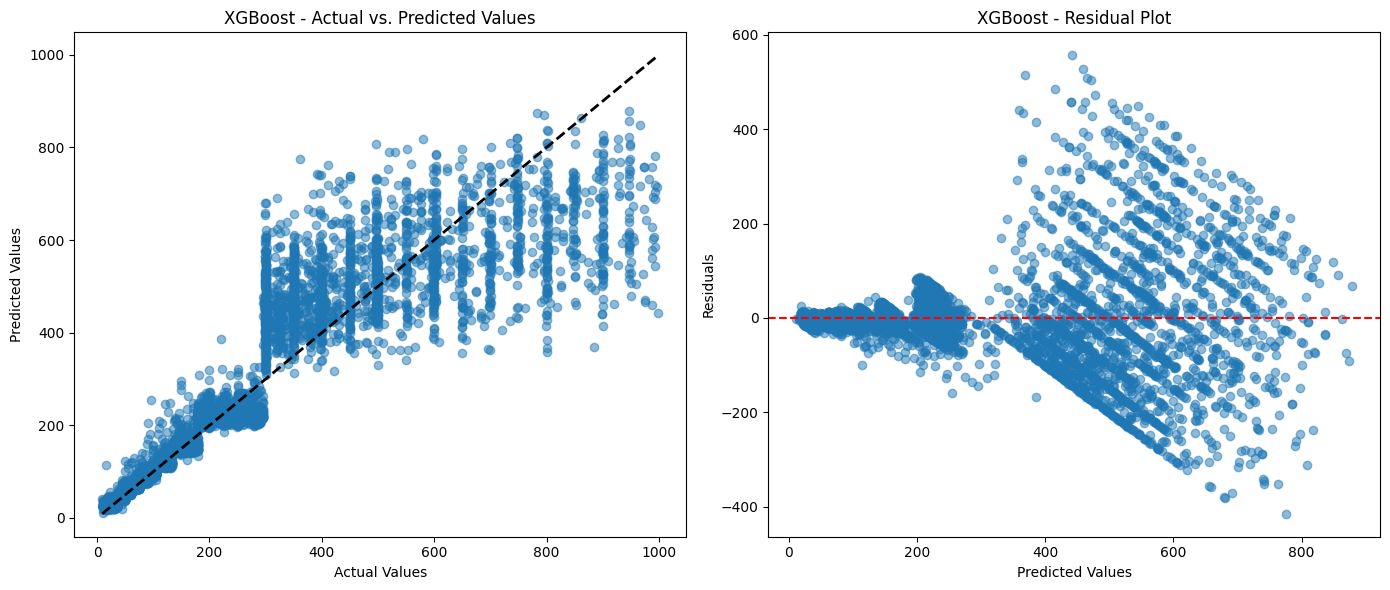

In [118]:
predictions_xgb_flat = predictions_xgb.flatten()
plt.figure(figsize=(14, 6))
# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_xgb_flat, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost - Actual vs. Predicted Values')
# Residual Plot
plt.subplot(1, 2, 2)
residuals_xgb = y_test - predictions_xgb_flat
plt.scatter(predictions_xgb_flat, residuals_xgb, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost - Residual Plot')
plt.tight_layout()
plt.show()

In [119]:
model_ev = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest Regressor', 'CatBoost Regressor', 'LightGBM Regressor', 'Seqential Regression', 'XGBoost Regressor'],
    'RMSE': [rmse_linreg, rmse_ridge, rmse_las, rmse_rndfrst, rmse_cat, rmse_lgbm, rmse, rmse_xgb],
    'MAE': [mae_lin, mae_ridge, mae_las, mae_rndfrst, mae_cat, mae_lgb, mae, mae_xgb],
    'R² Score': [linr2, ridge_r2, lasso_r2, rfr2, catr2, lgbmr2, seqr_squared, r2_xgb]
})
print(model_ev)

                     Model        RMSE        MAE  R² Score
0        Linear Regression  112.853276  66.450706  0.428858
1         Ridge Regression  112.853276  66.450706  0.428858
2         Lasso Regression  112.976568  66.450706  0.427609
3  Random Forest Regressor  105.807570  59.793509  0.497947
4       CatBoost Regressor  101.029792  57.337646  0.542264
5       LightGBM Regressor  100.591952  56.886379  0.546223
6     Seqential Regression   58.385998  24.589969  0.874886
7        XGBoost Regressor   55.838944  21.931599  0.885564


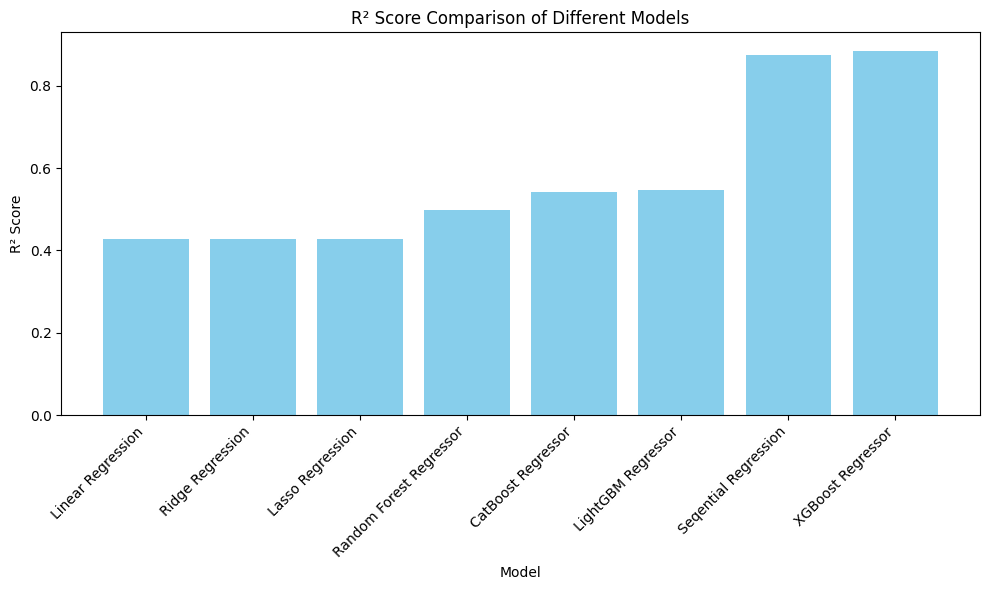

In [120]:
models = model_ev['Model']
r2_scores = model_ev['R² Score']
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score Comparison of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

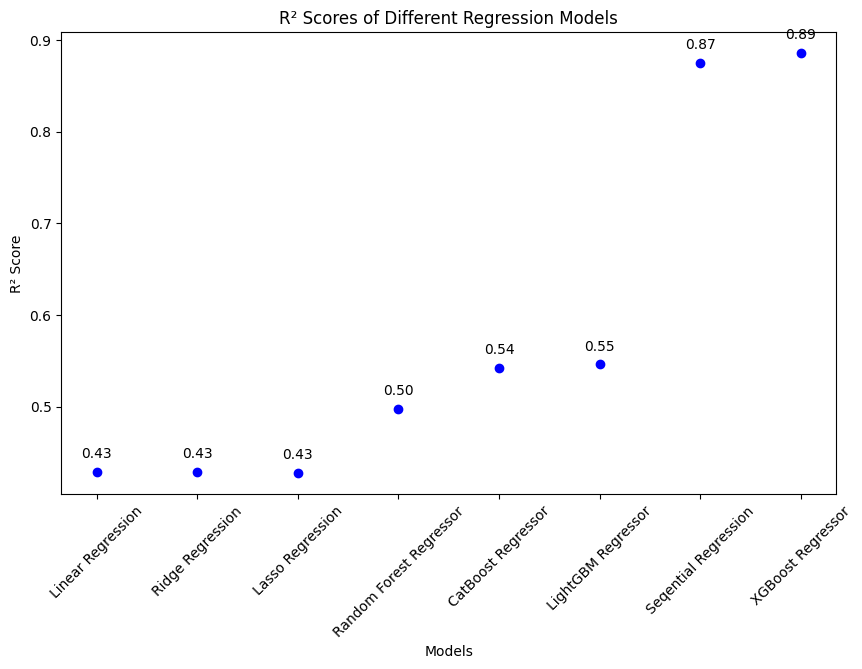

In [121]:
models = model_ev['Model']
r2_scores = model_ev['R² Score']
plt.figure(figsize=(10, 6))
plt.scatter(models, r2_scores, color='blue')
plt.title('R² Scores of Different Regression Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
for i, txt in enumerate(r2_scores):
    plt.annotate(f"{txt:.2f}", (models[i], r2_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

In [122]:
import pickle

with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

# WEB APPLICATION DEVELOPEMENT

In [123]:
with open('xgb_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [124]:
# np.random.seed(48)
random_input_data = {
    'Host Total Listings Count': np.random.randint(1, 1115, size=1),
    'Room Type': np.random.randint(0, 2, size=1),
    'Accommodates': np.random.randint(1, 18, size=1),
    'Bathrooms': np.random.randint(1, 8, size=1),
    'Bedrooms': np.random.randint(1, 10, size=1),
    'Beds': np.random.randint(1, 18, size=1),
    'Bed Type': np.random.randint(0, 4, size=1),
    'Cleaning Fee': np.random.randint(0, 805, size=1),
    'Extra People': np.random.randint(0, 1000, size=1),
    'Minimum Nights': np.random.randint(1, 535, size=1),
    'Number of Reviews': np.random.randint(0, 750, size=1),
    'Review Scores Cleanliness': np.random.randint(1, 10, size=1),
    'Review Scores Checkin': np.random.randint(1, 10, size=1),
    'Review Scores Communication': np.random.randint(1, 10, size=1),
    'Review Scores Location': np.random.randint(1, 10, size=1),
    'Review Rating': np.random.randint(0, 100, size=1),
    'Host Response Rate': np.random.randint(0, 100, size=1),
    'Category': np.random.randint(0, 4, size=1),
    'Cancellation Type': np.random.randint(0, 2, size=1),
    'Amenities Score': np.random.uniform(0, 10, size=1),
    'Bins': np.random.randint(0, 9, size=1)
}

input_df = pd.DataFrame(random_input_data)

In [125]:
input_df

Host Total Listings Count  Room Type  Accommodates  Bathrooms  Bedrooms  \
0                        779          1             1          2         4   

   Beds  Bed Type  Cleaning Fee  Extra People  Minimum Nights  ...  \
0     9         2            41           570             477  ...   

   Review Scores Cleanliness  Review Scores Checkin  \
0                          7                      1   

   Review Scores Communication  Review Scores Location  Review Rating  \
0                            6                       4             84   

   Host Response Rate  Category  Cancellation Type  Amenities Score  Bins  
0                  60         2                  0         2.480538     7  

[1 rows x 21 columns]

In [126]:
predictions = model.predict(input_df)

In [127]:
print("Price:", predictions)

Price: [502.9658]


In [128]:
manual_check_values = {
    'Host Total Listings Count':19,
    'Room Type': 1,
    'Accommodates': 1,
    'Bathrooms': 2,
    'Bedrooms': 8,
    'Beds': 3,
    'Bed Type': 1,
    'Cleaning Fee': 38,
    'Extra People': 17,
    'Minimum Nights': 5,
    'Number of Reviews': 0,
    'Review Scores Cleanliness': 6,
    'Review Scores Checkin': 2,
    'Review Scores Communication': 4,
    'Review Scores Location': 5,
    'Review Rating': 39,
    'Host_Response_Rate': 21,
    'Category': 0,
    'Cancellation Type': 2,
    'Amenities_Score': 5.32,
    'Bins': 9
}

inputman = pd.DataFrame(manual_check_values,index=[0])

In [129]:
manpredictions = model.predict(inputman)

In [130]:
print("Price:", manpredictions)

Price: [529.9141]
